In [1]:
import os
import pandas as pd
from pandas import read_csv
from datetime import datetime
os.chdir(r"C:\Users\USER\Desktop\ETo data")
data = read_csv('Mokoliki.csv', header = 6, names = ['Date', 'Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation', 'ETo'])
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
df = data['Sunlight hours']
data.head(7)





Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01      23.3      31.9        1.38        9.720833         17.29728   
1979-02-01      23.5      32.6        1.89        9.803611         17.24544   
1979-03-01      24.3      33.0        1.68       10.176111         18.24768   
1979-04-01      23.8      32.1        1.85        9.694167         17.15904   
1979-05-01      22.9      30.4        1.55       10.227222         18.61056   
1979-06-01      22.1      28.5        1.93        8.611389         13.35744   
1979-07-01      22.0      27.8        2.21        7.549167         11.10240   

             ETo  
Date              
1979-01-01  4.05  
1979-02-01  4.45  
1979-03-01  4.59  
1979-04-01  4.43  
1979-05-01  4.30  
1979-06-01  3.45  
1979-07-01  3.14

### Checking for missing values

In [2]:
print(data.isnull())
print(data.isnull().any())

            Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01     False     False       False           False            False   
1979-02-01     False     False       False           False            False   
1979-03-01     False     False       False           False            False   
1979-04-01     False     False       False           False            False   
1979-05-01     False     False       False           False            False   
...              ...       ...         ...             ...              ...   
2016-10-01     False     False       False           False            False   
2016-11-01     False     False       False           False            False   
2016-12-01     False     False       False           False            False   
2017-01-01     False     False       False           False            False   
2017-02-01     False     False       False          

### Importing the necessary libraries

In [3]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import statistics
from scipy import stats
import plotly.express as px
from sklearn.metrics import mean_squared_error


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Plotting the variables for analysis

array([[<AxesSubplot:title={'center':'Temp min'}>,
        <AxesSubplot:title={'center':'Temp max'}>],
       [<AxesSubplot:title={'center':'Wind speed'}>,
        <AxesSubplot:title={'center':'Sunlight hours'}>],
       [<AxesSubplot:title={'center':'Solar Radiation'}>,
        <AxesSubplot:title={'center':'ETo'}>]], dtype=object)

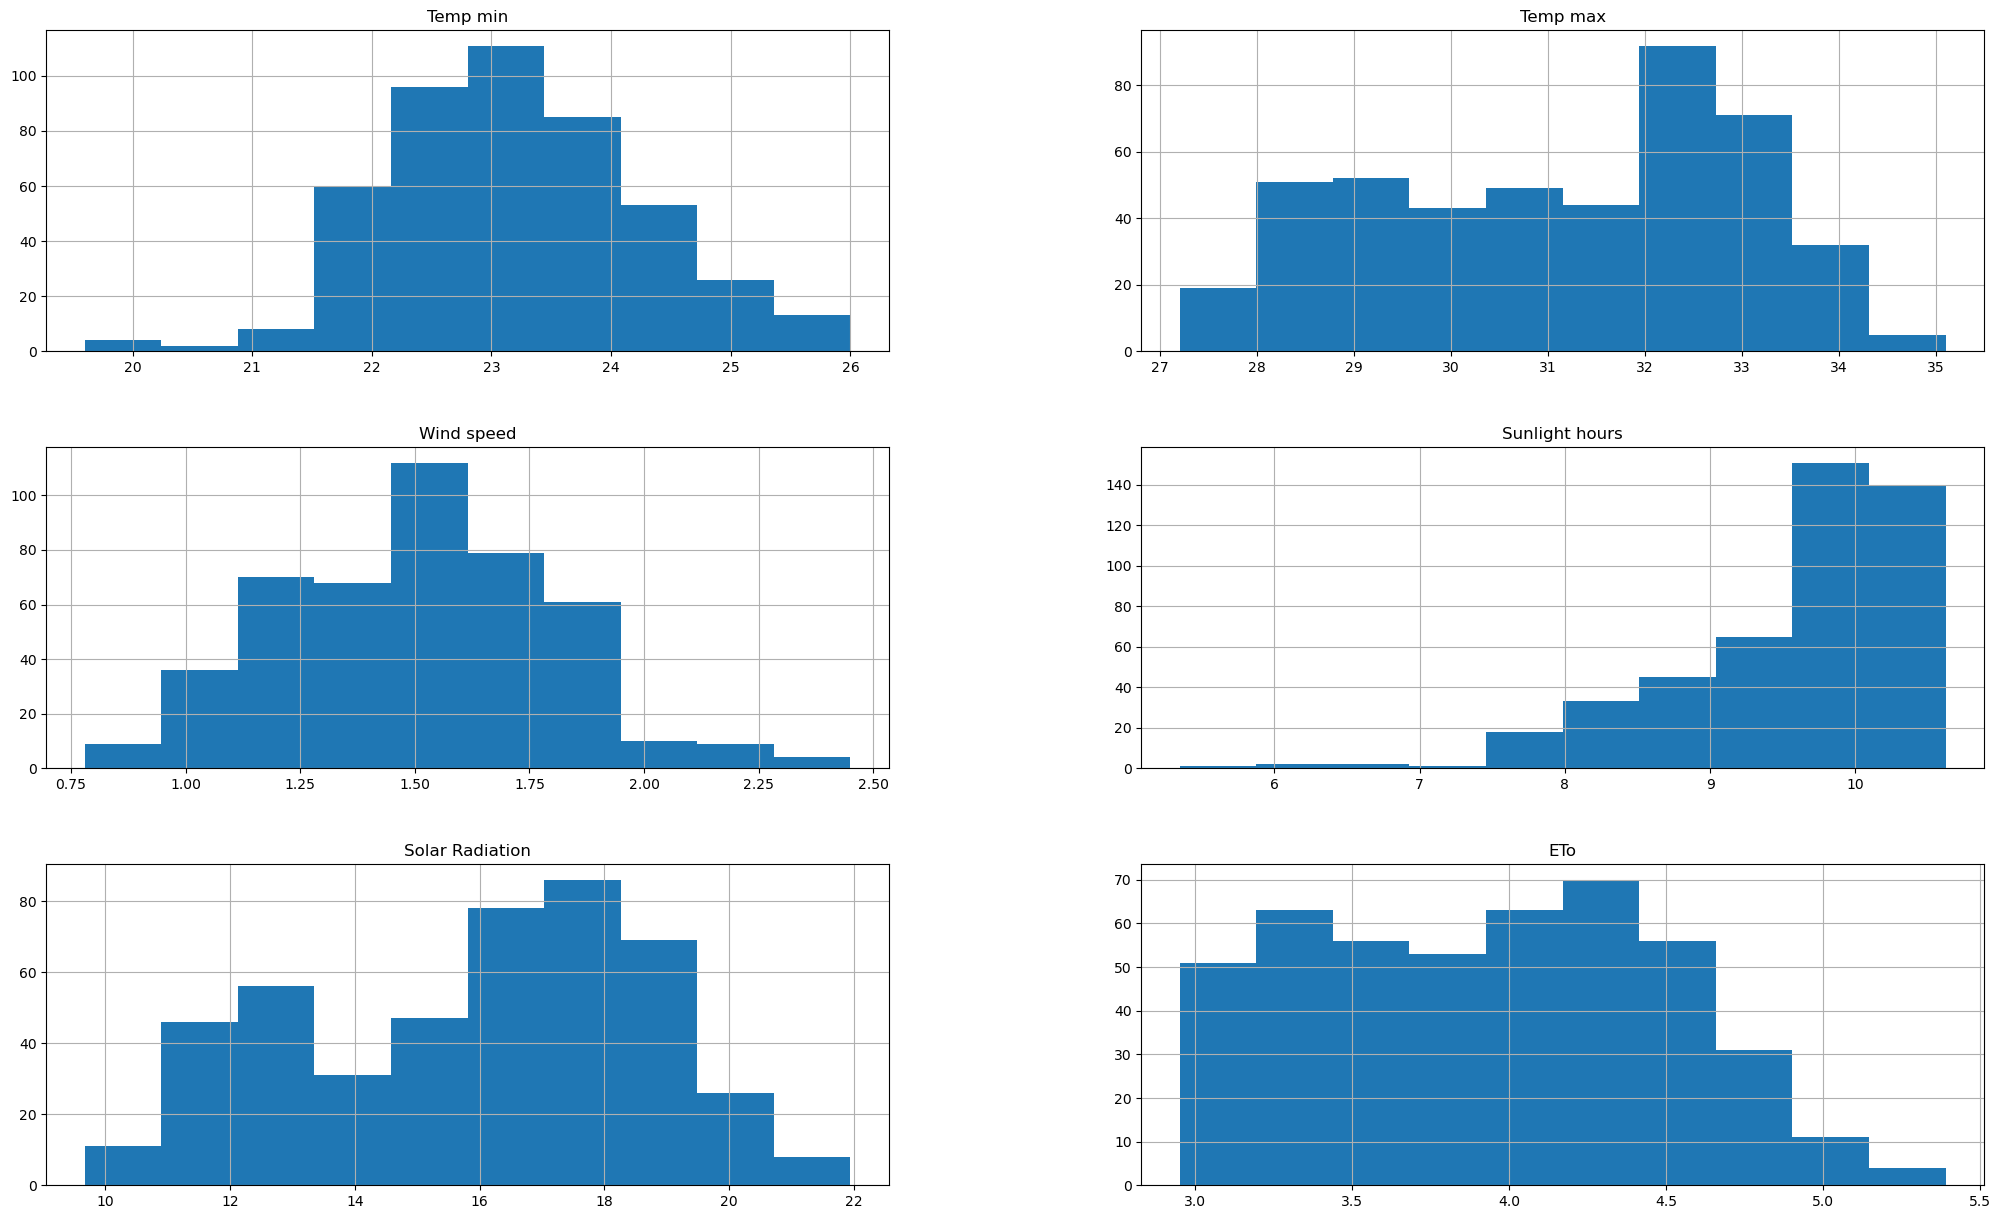

In [4]:
data.hist(figsize=(25,15))

<AxesSubplot:>

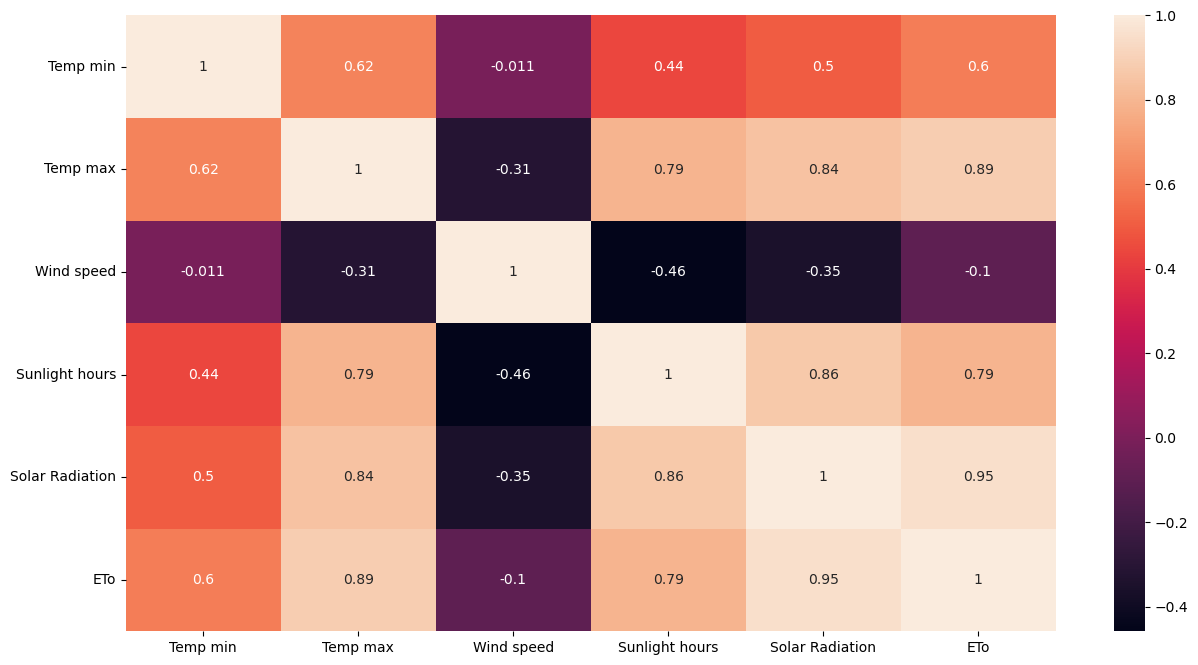

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="rocket")

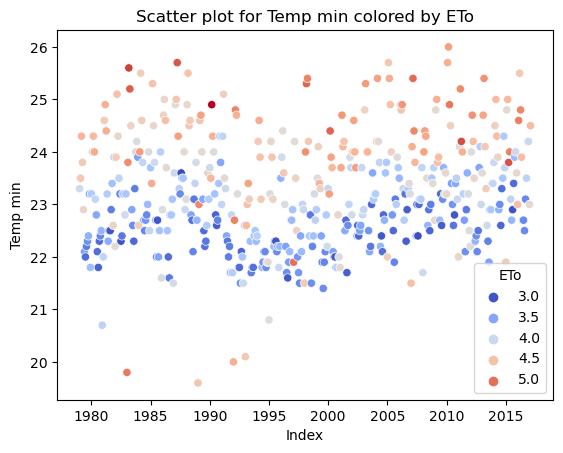

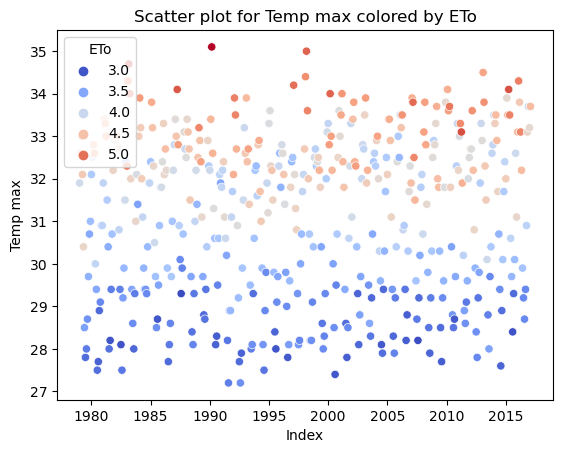

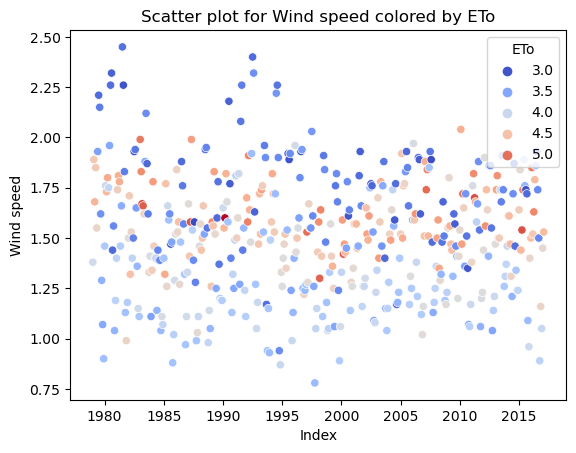

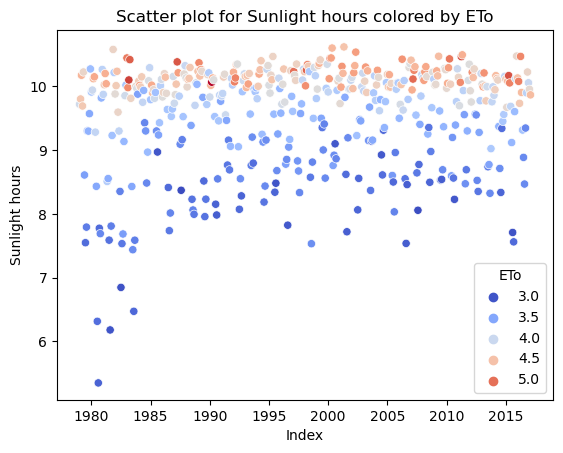

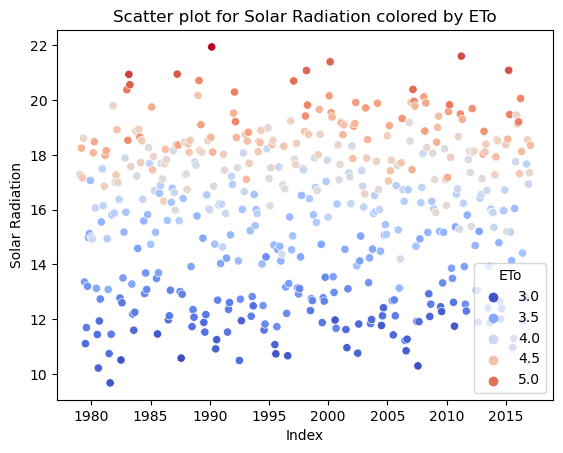

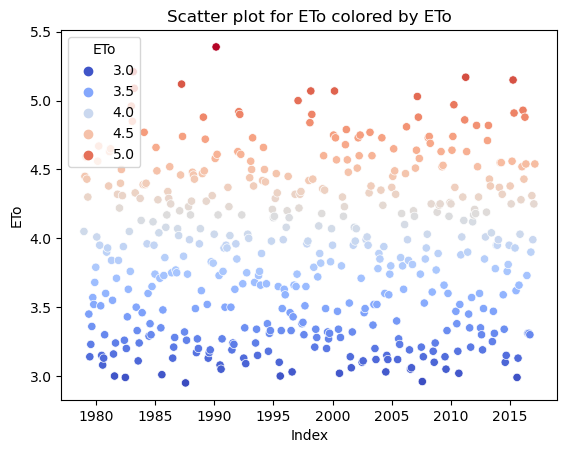

In [6]:
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'Date']

for feature in numerical_columns:
    sns.scatterplot(x=data.index, y=data[feature], hue=data['ETo'], palette='coolwarm')
    plt.title(f'Scatter plot for {feature} colored by ETo')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.show()

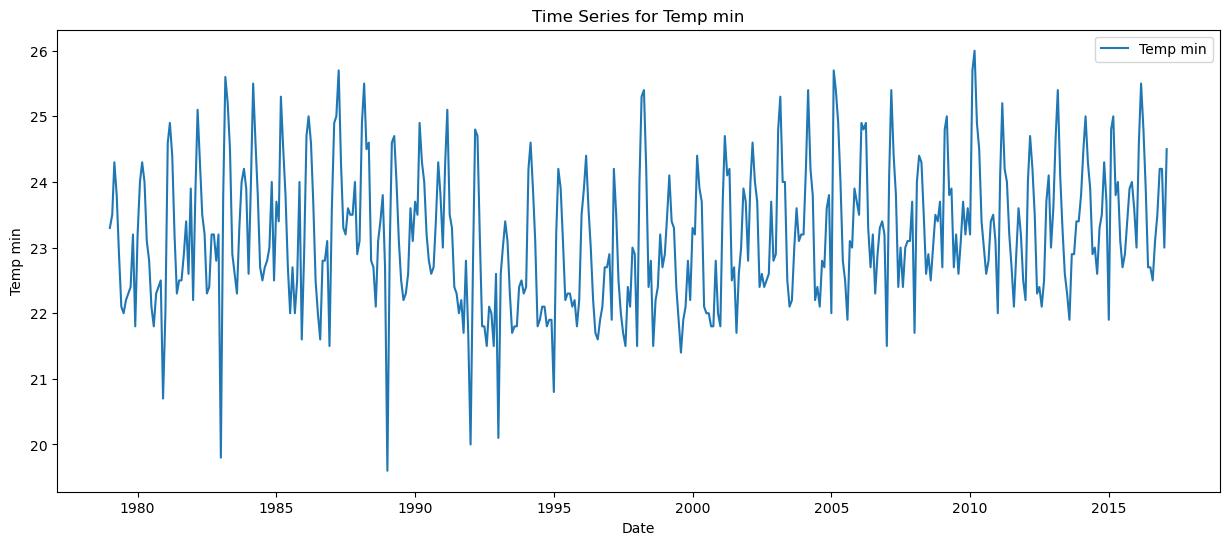

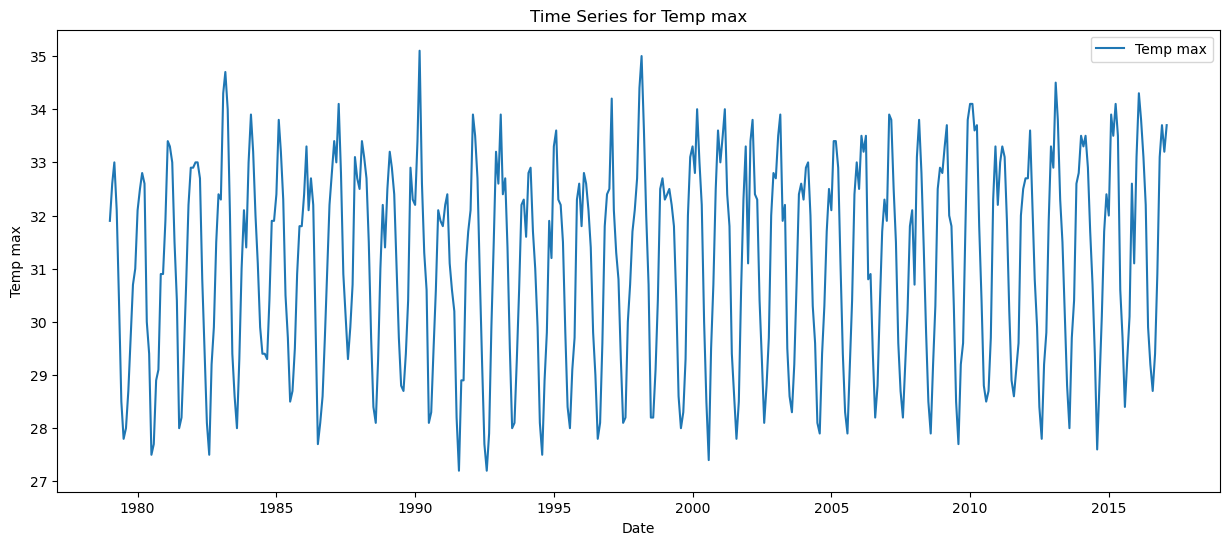

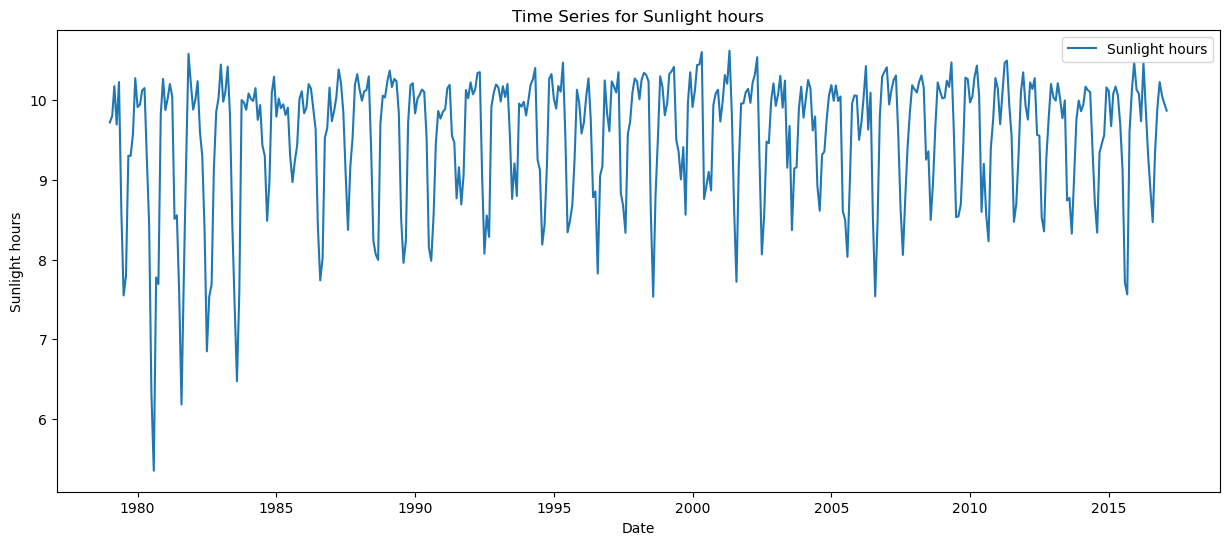

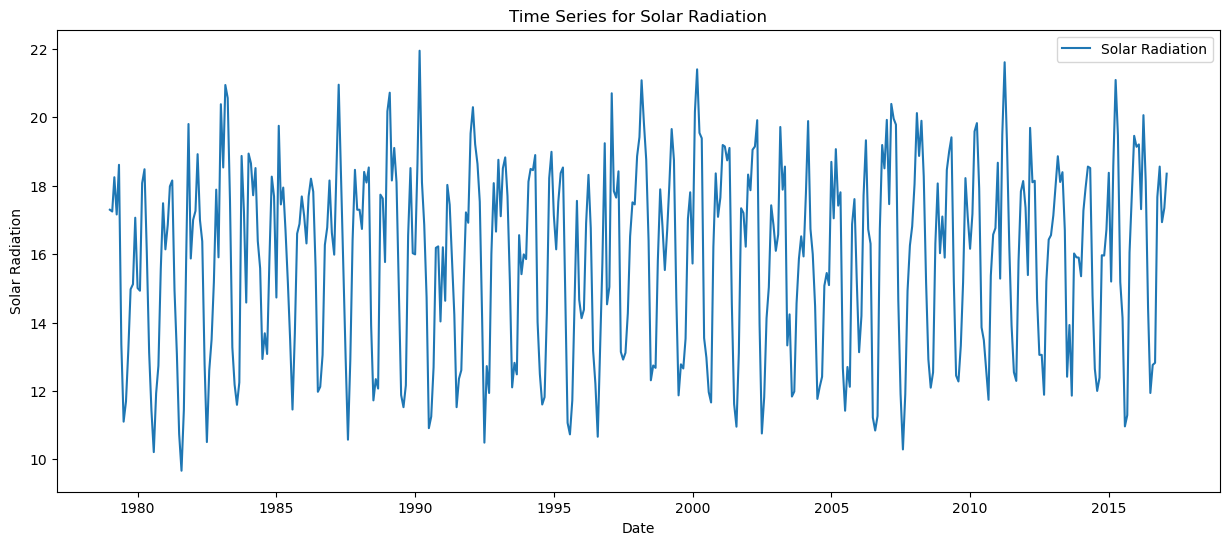

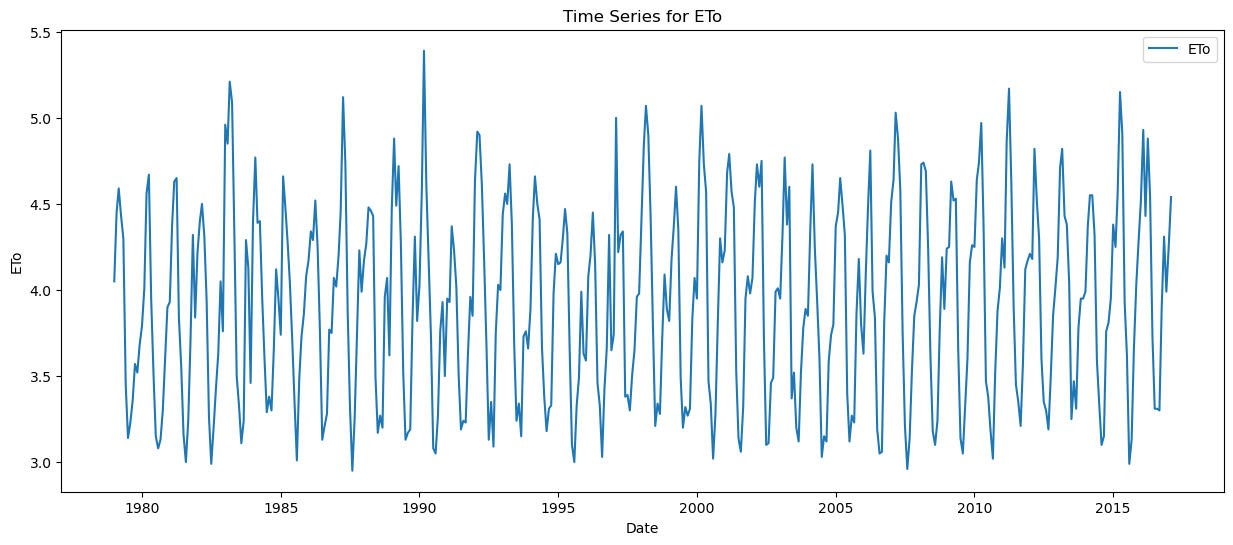

In [7]:
#Time series plot
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'date']
for feature in numerical_columns:
    plt.figure(figsize=(15, 6))
    plt.plot(data.index, data[feature], label=feature)
    plt.title(f'Time Series for {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [8]:
#Setting the input features and target variable

x = data[['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (274, 5)
the shape of the training set (target) is: (274,)

the shape of the cross validation set (input) is: (92, 5)
the shape of the cross validation set (target) is: (92,)

the shape of the test set (input) is: (92, 5)
the shape of the test set (target) is: (92,)


In [9]:
import Utils
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)


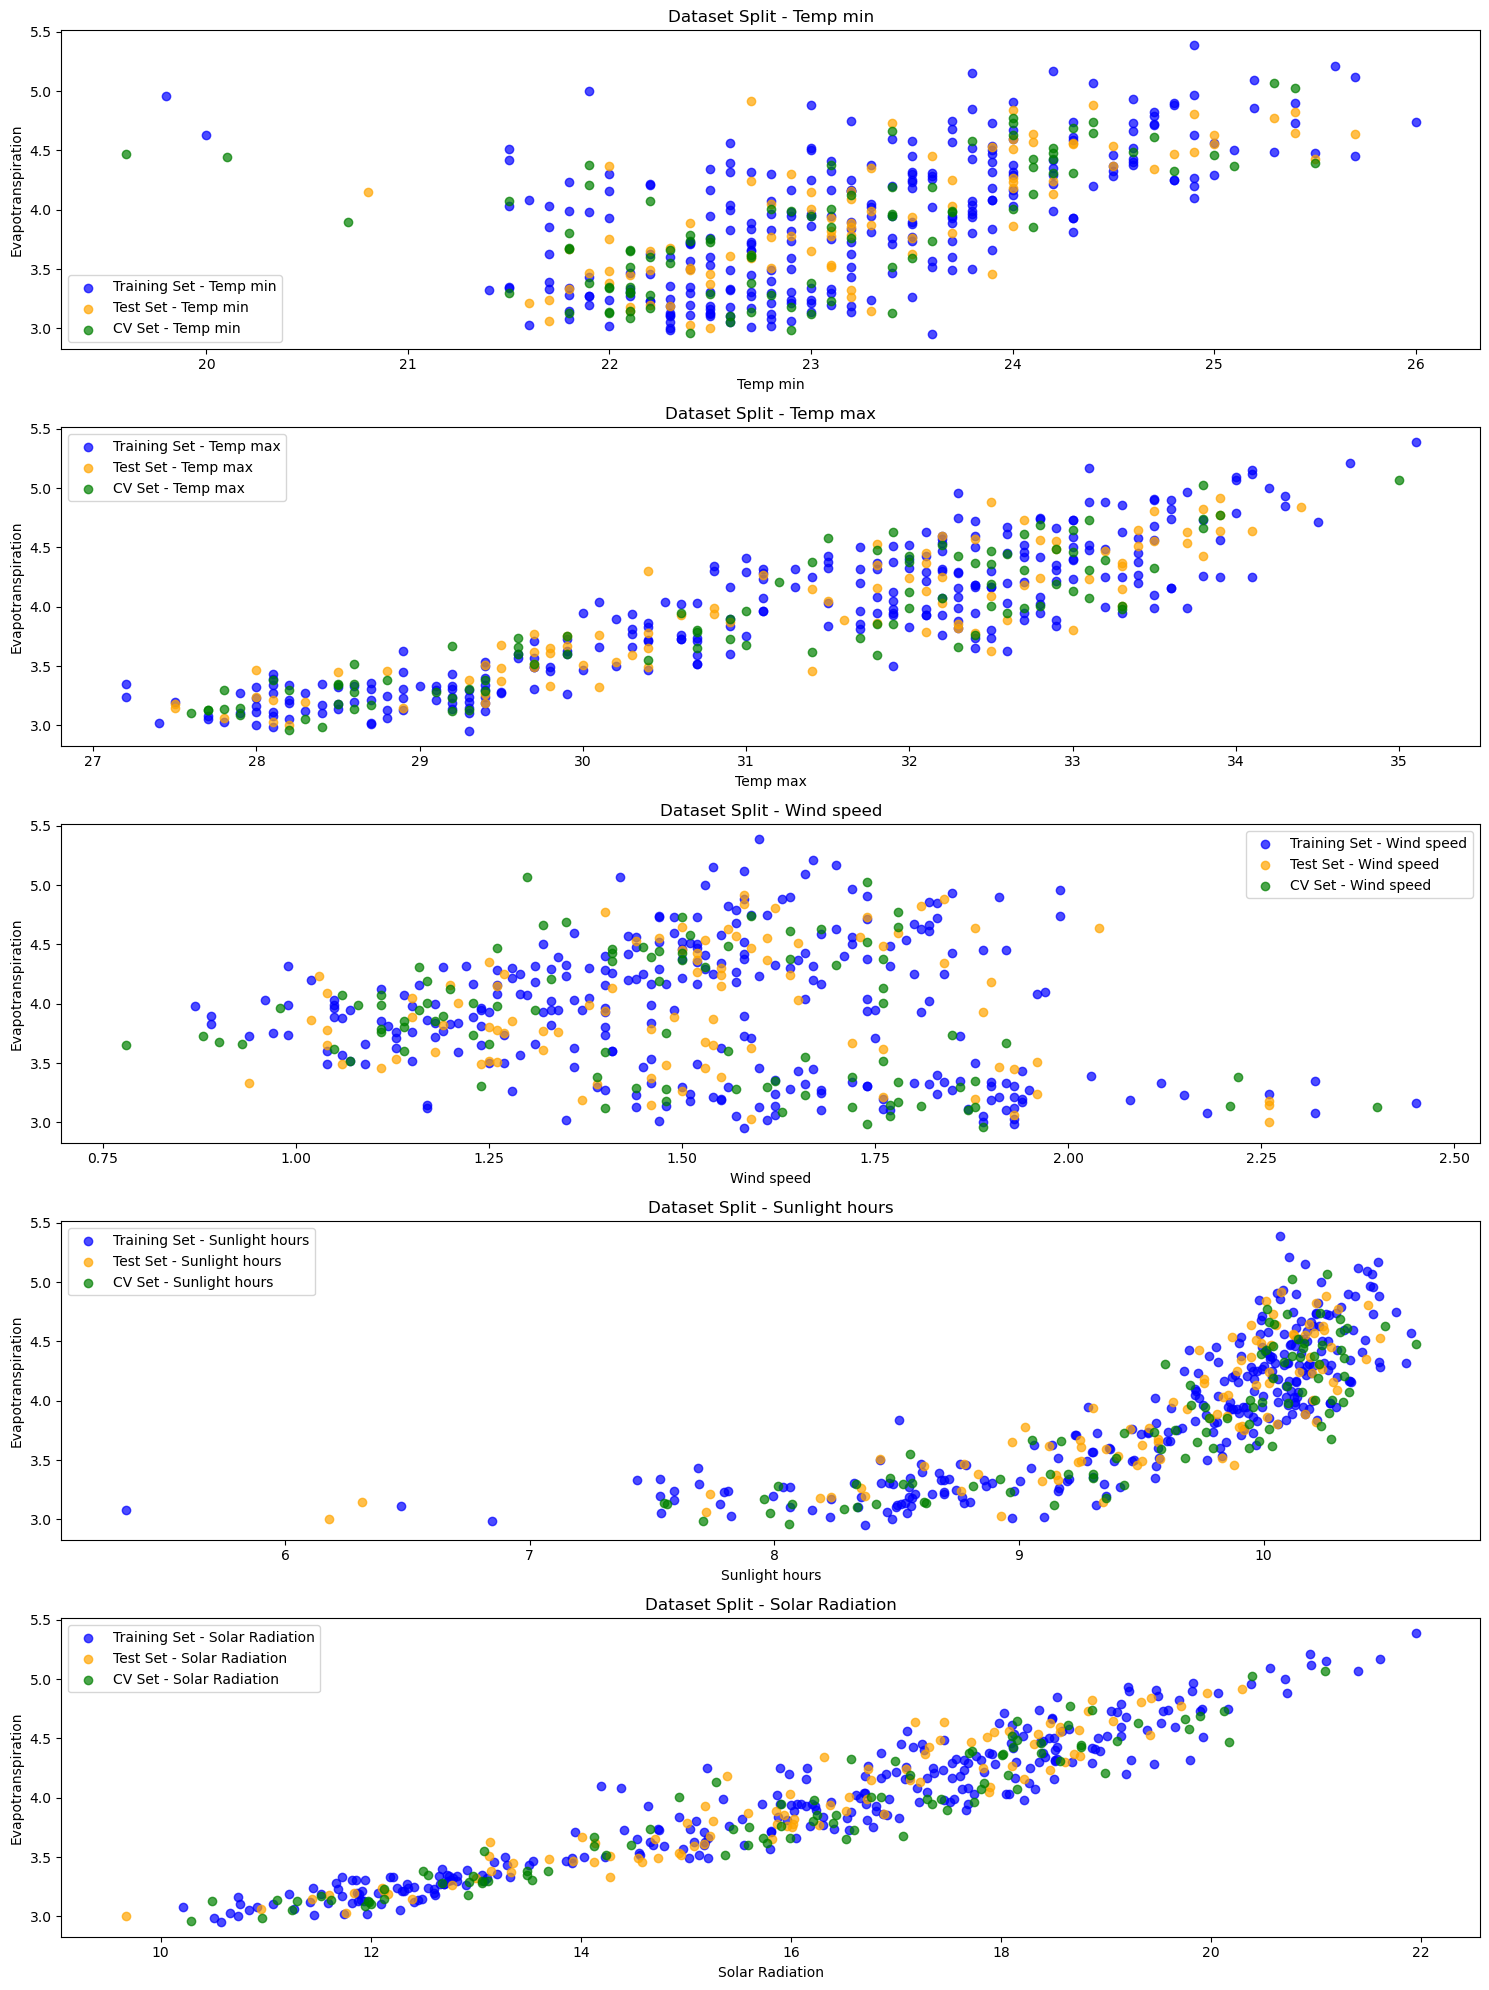

In [10]:
import numpy as np
from Utils import plot_dataset_split

features = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation'] 
plot_dataset_split(x_train, x_test, x_cv, y_train, y_test, y_cv, features)

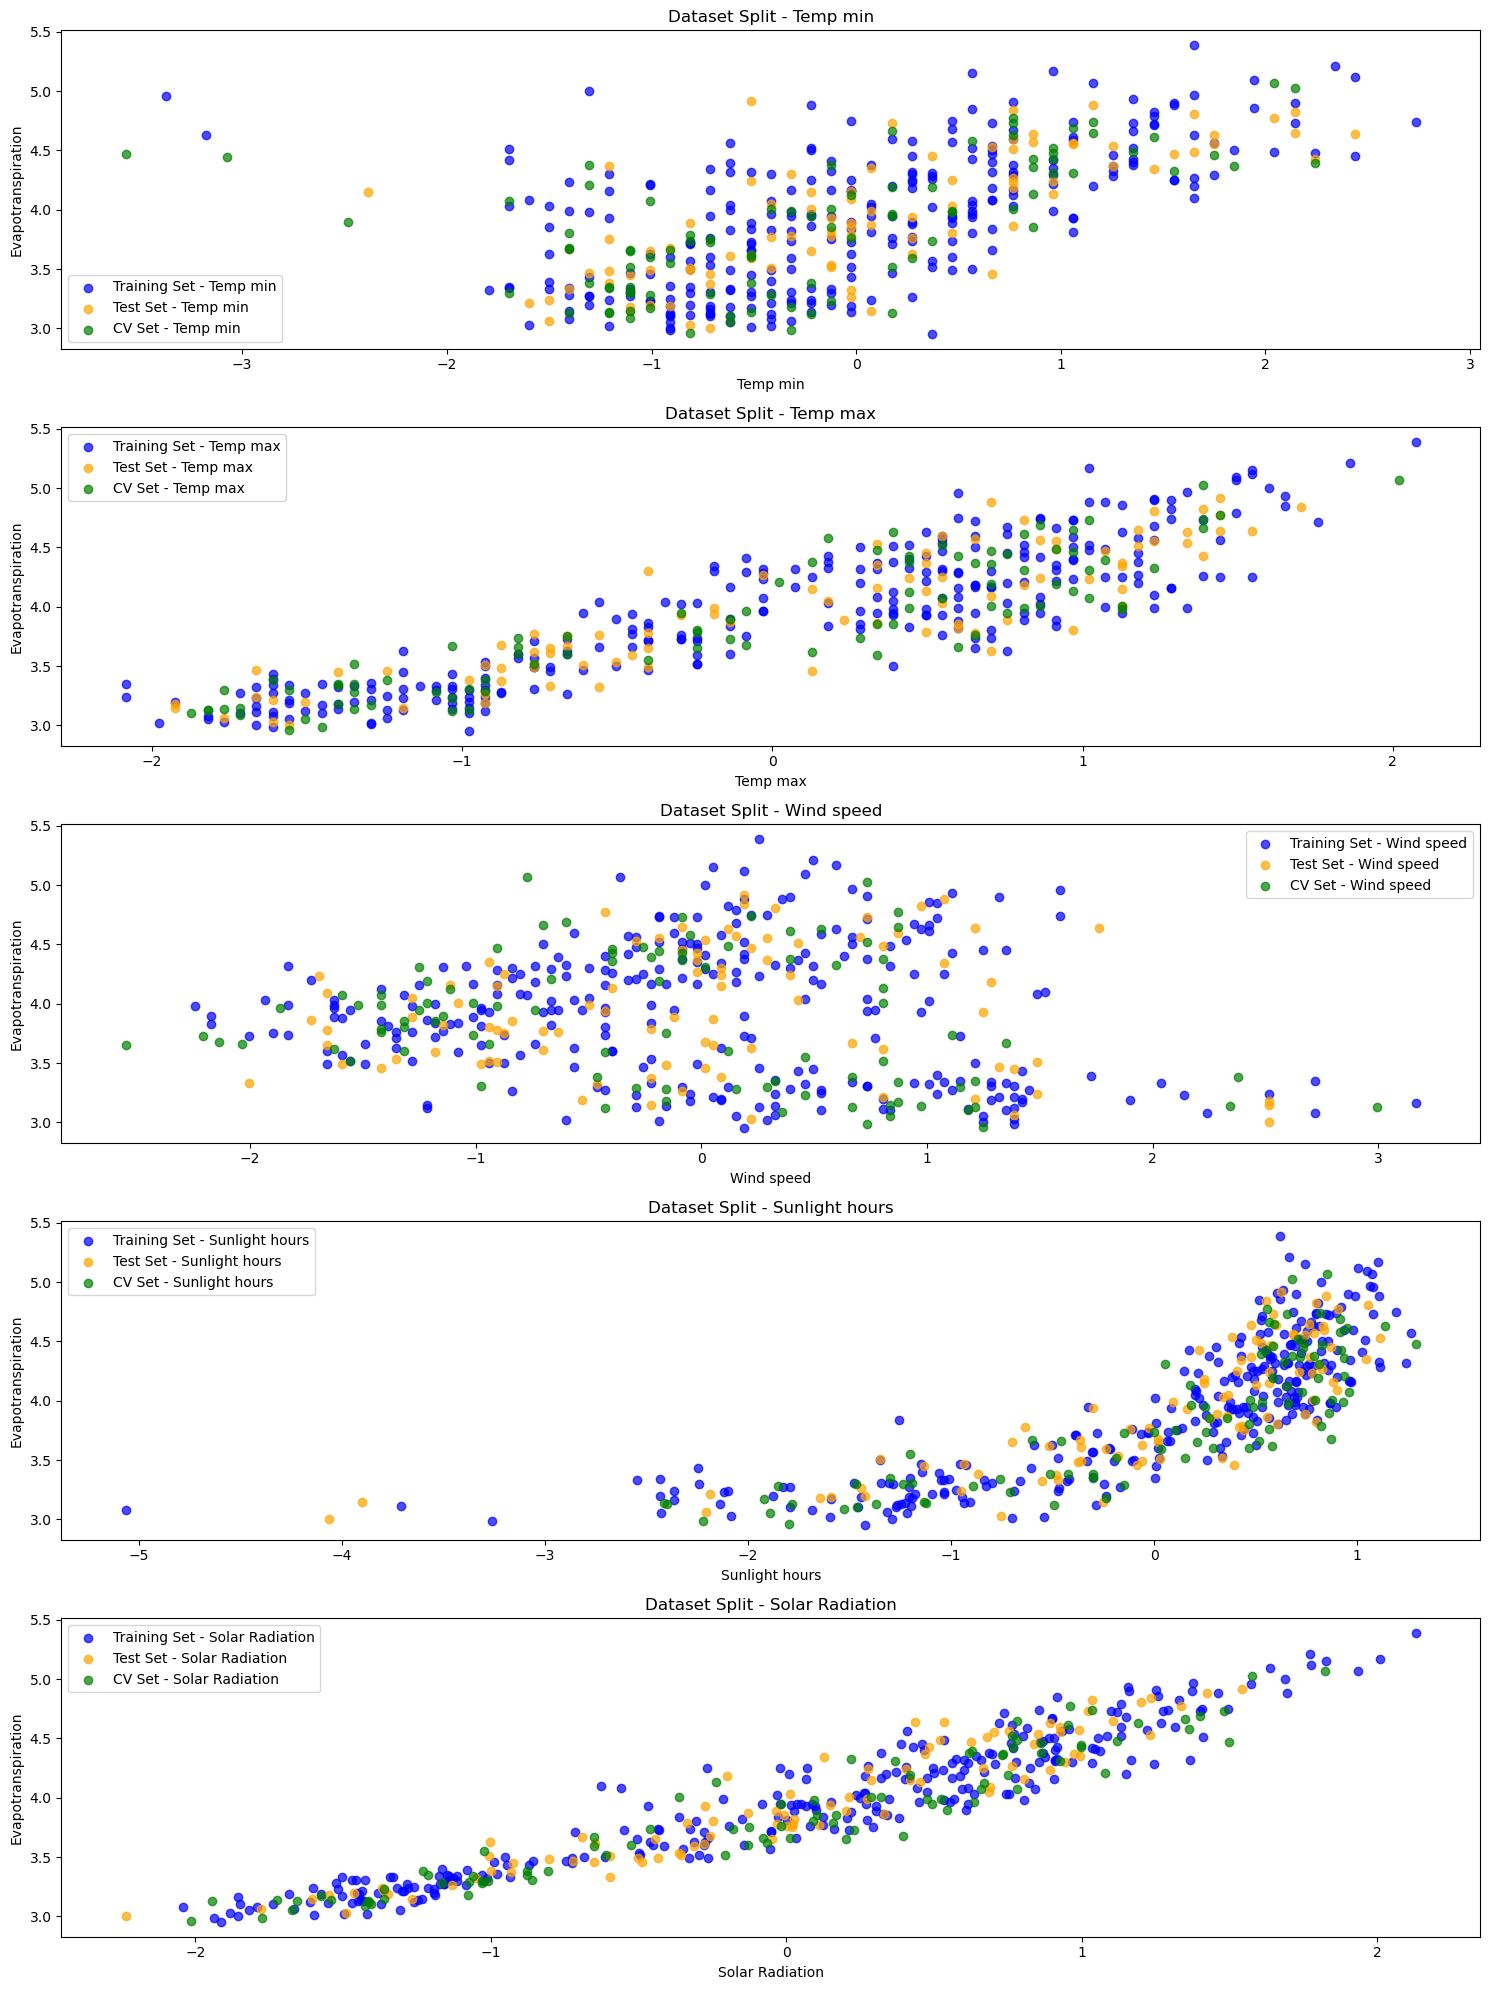

In [11]:
#Scaling the input features

np.set_printoptions(precision=2)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)
plot_dataset_split(x_train_scaled, x_test_scaled, x_cv_scaled, y_train, y_test, y_cv, features)

### Neural Network Training
### Model 1: All input features

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled, y_train,
    epochs=150
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/150
9/9 [==============================] - 2s 4ms/step - loss: 13.2015 - mae: 3.6077
Epoch 2/150
9/9 [==============================] - 0s 5ms/step - loss: 12.1958 - mae: 3.4658
Epoch 3/150
9/9 [==============================] - 0s 9ms/step - loss: 11.2484 - mae: 3.3267
Epoch 4/150
9/9 [==============================] - 0s 9ms/step - loss: 10.3225 - mae: 3.1847
Epoch 5/150
9/9 [==============================] - 0s 5ms/step - loss: 9.4602 - mae: 3.0443
Epoch 6/150
9/9 [==============================] - 0s 4ms/step - loss: 8.6326 - mae: 2.9037
Epoch 7/150
9/9 [==============================] - 0s 4ms/step - loss: 7.8487 - mae: 2.7628
Epoch 8/150
9/9 [==============================] - 0s 4ms/step - loss: 7.1086 - mae: 2.6217
Epoch 9/150
9/9 [==============================] - 0s 5ms/step - loss: 6.4070 - mae: 2.4799
Epoch 10/150
9/9 [==============================] - 0s 5ms/step - loss: 5.7537 - mae: 2.3397
Epoch 11/150
9/9 [==============================] - 0s 5ms/step - loss: 5.1

9/9 [==============================] - 0s 4ms/step - loss: 0.2511 - mae: 0.4057
Epoch 90/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2447 - mae: 0.4006
Epoch 91/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2384 - mae: 0.3950
Epoch 92/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2322 - mae: 0.3898
Epoch 93/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2268 - mae: 0.3852
Epoch 94/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2208 - mae: 0.3799
Epoch 95/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2158 - mae: 0.3752
Epoch 96/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2101 - mae: 0.3701
Epoch 97/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2053 - mae: 0.3655
Epoch 98/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2000 - mae: 0.3606
Epoch 99/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1955 - ma

9/9 [==============================] - 0s 8ms/step - loss: 1.6261 - mae: 1.0020
Epoch 27/150
9/9 [==============================] - 0s 4ms/step - loss: 1.5399 - mae: 0.9696
Epoch 28/150
9/9 [==============================] - 0s 5ms/step - loss: 1.4658 - mae: 0.9409
Epoch 29/150
9/9 [==============================] - 0s 5ms/step - loss: 1.4001 - mae: 0.9146
Epoch 30/150
9/9 [==============================] - 0s 8ms/step - loss: 1.3414 - mae: 0.8923
Epoch 31/150
9/9 [==============================] - 0s 7ms/step - loss: 1.2899 - mae: 0.8727
Epoch 32/150
9/9 [==============================] - 0s 5ms/step - loss: 1.2400 - mae: 0.8521
Epoch 33/150
9/9 [==============================] - 0s 4ms/step - loss: 1.1983 - mae: 0.8346
Epoch 34/150
9/9 [==============================] - 0s 5ms/step - loss: 1.1575 - mae: 0.8181
Epoch 35/150
9/9 [==============================] - 0s 5ms/step - loss: 1.1218 - mae: 0.8026
Epoch 36/150
9/9 [==============================] - 0s 6ms/step - loss: 1.0857 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.2044 - mae: 0.2786
Epoch 115/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2006 - mae: 0.2747
Epoch 116/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1975 - mae: 0.2715
Epoch 117/150
9/9 [==============================] - 0s 7ms/step - loss: 0.1938 - mae: 0.2674
Epoch 118/150
9/9 [==============================] - 0s 7ms/step - loss: 0.1909 - mae: 0.2646
Epoch 119/150
9/9 [==============================] - 0s 7ms/step - loss: 0.1877 - mae: 0.2608
Epoch 120/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1841 - mae: 0.2570
Epoch 121/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1810 - mae: 0.2535
Epoch 122/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1780 - mae: 0.2501
Epoch 123/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1750 - mae: 0.2469
Epoch 124/150
9/9 [==============================] - 0s 7ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.8517 - mae: 0.5825
Epoch 52/150
9/9 [==============================] - 0s 6ms/step - loss: 0.8332 - mae: 0.5745
Epoch 53/150
9/9 [==============================] - 0s 8ms/step - loss: 0.8162 - mae: 0.5666
Epoch 54/150
9/9 [==============================] - 0s 6ms/step - loss: 0.7994 - mae: 0.5587
Epoch 55/150
9/9 [==============================] - 0s 7ms/step - loss: 0.7833 - mae: 0.5506
Epoch 56/150
9/9 [==============================] - 0s 6ms/step - loss: 0.7670 - mae: 0.5422
Epoch 57/150
9/9 [==============================] - 0s 7ms/step - loss: 0.7504 - mae: 0.5338
Epoch 58/150
9/9 [==============================] - 0s 6ms/step - loss: 0.7349 - mae: 0.5261
Epoch 59/150
9/9 [==============================] - 0s 5ms/step - loss: 0.7198 - mae: 0.5182
Epoch 60/150
9/9 [==============================] - 0s 5ms/step - loss: 0.7032 - mae: 0.5097
Epoch 61/150
9/9 [==============================] - 0s 11ms/step - loss: 0.6886 - m

9/9 [==============================] - 0s 5ms/step - loss: 0.1830 - mae: 0.1702
Epoch 139/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1804 - mae: 0.1677
Epoch 140/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1777 - mae: 0.1657
Epoch 141/150
9/9 [==============================] - 0s 8ms/step - loss: 0.1752 - mae: 0.1637
Epoch 142/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1728 - mae: 0.1619
Epoch 143/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1704 - mae: 0.1601
Epoch 144/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1680 - mae: 0.1581
Epoch 145/150
9/9 [==============================] - 0s 8ms/step - loss: 0.1657 - mae: 0.1564
Epoch 146/150
9/9 [==============================] - 0s 9ms/step - loss: 0.1634 - mae: 0.1549
Epoch 147/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1611 - mae: 0.1529
Epoch 148/150
9/9 [==============================] - 0s 8ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.4856 - mae: 0.2735
Epoch 76/150
9/9 [==============================] - 0s 8ms/step - loss: 0.4726 - mae: 0.2667
Epoch 77/150
9/9 [==============================] - 0s 7ms/step - loss: 0.4602 - mae: 0.2600
Epoch 78/150
9/9 [==============================] - 0s 8ms/step - loss: 0.4479 - mae: 0.2537
Epoch 79/150
9/9 [==============================] - 0s 8ms/step - loss: 0.4364 - mae: 0.2481
Epoch 80/150
9/9 [==============================] - 0s 6ms/step - loss: 0.4247 - mae: 0.2420
Epoch 81/150
9/9 [==============================] - 0s 11ms/step - loss: 0.4138 - mae: 0.2366
Epoch 82/150
9/9 [==============================] - 0s 5ms/step - loss: 0.4032 - mae: 0.2307
Epoch 83/150
9/9 [==============================] - 0s 6ms/step - loss: 0.3928 - mae: 0.2256
Epoch 84/150
9/9 [==============================] - 0s 12ms/step - loss: 0.3824 - mae: 0.2199
Epoch 85/150
9/9 [==============================] - 0s 7ms/step - loss: 0.3727 - 

9/9 [==============================] - 0s 5ms/step - loss: 9.2281 - mae: 2.5407
Epoch 13/150
9/9 [==============================] - 0s 9ms/step - loss: 8.6920 - mae: 2.4372
Epoch 14/150
9/9 [==============================] - 0s 7ms/step - loss: 8.1789 - mae: 2.3344
Epoch 15/150
9/9 [==============================] - 0s 5ms/step - loss: 7.6548 - mae: 2.2290
Epoch 16/150
9/9 [==============================] - 0s 5ms/step - loss: 7.1679 - mae: 2.1226
Epoch 17/150
9/9 [==============================] - 0s 4ms/step - loss: 6.6881 - mae: 2.0165
Epoch 18/150
9/9 [==============================] - 0s 4ms/step - loss: 6.2163 - mae: 1.9095
Epoch 19/150
9/9 [==============================] - 0s 10ms/step - loss: 5.7772 - mae: 1.8041
Epoch 20/150
9/9 [==============================] - 0s 8ms/step - loss: 5.3517 - mae: 1.6983
Epoch 21/150
9/9 [==============================] - 0s 7ms/step - loss: 4.9610 - mae: 1.5967
Epoch 22/150
9/9 [==============================] - 0s 5ms/step - loss: 4.5982 - m

9/9 [==============================] - 0s 9ms/step - loss: 0.1511 - mae: 0.0823
Epoch 101/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1456 - mae: 0.0796
Epoch 102/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1404 - mae: 0.0773
Epoch 103/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1354 - mae: 0.0754
Epoch 104/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1306 - mae: 0.0734
Epoch 105/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1260 - mae: 0.0717
Epoch 106/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1215 - mae: 0.0701
Epoch 107/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1173 - mae: 0.0685
Epoch 108/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1132 - mae: 0.0668
Epoch 109/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1093 - mae: 0.0651
Epoch 110/150
9/9 [==============================] - 0s 9ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 2.4216 - mae: 0.6474
Epoch 38/150
9/9 [==============================] - 0s 6ms/step - loss: 2.3215 - mae: 0.6282
Epoch 39/150
9/9 [==============================] - 0s 4ms/step - loss: 2.2207 - mae: 0.6091
Epoch 40/150
9/9 [==============================] - 0s 6ms/step - loss: 2.1269 - mae: 0.5914
Epoch 41/150
9/9 [==============================] - 0s 5ms/step - loss: 2.0331 - mae: 0.5739
Epoch 42/150
9/9 [==============================] - 0s 5ms/step - loss: 1.9452 - mae: 0.5572
Epoch 43/150
9/9 [==============================] - 0s 5ms/step - loss: 1.8590 - mae: 0.5403
Epoch 44/150
9/9 [==============================] - 0s 10ms/step - loss: 1.7753 - mae: 0.5230
Epoch 45/150
9/9 [==============================] - 0s 7ms/step - loss: 1.6942 - mae: 0.5054
Epoch 46/150
9/9 [==============================] - 0s 5ms/step - loss: 1.6166 - mae: 0.4886
Epoch 47/150
9/9 [==============================] - 0s 5ms/step - loss: 1.5407 - m

9/9 [==============================] - 0s 8ms/step - loss: 0.0504 - mae: 0.0611
Epoch 125/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0489 - mae: 0.0612
Epoch 126/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0473 - mae: 0.0607
Epoch 127/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0459 - mae: 0.0603
Epoch 128/150
9/9 [==============================] - 0s 10ms/step - loss: 0.0446 - mae: 0.0600
Epoch 129/150
9/9 [==============================] - 0s 10ms/step - loss: 0.0433 - mae: 0.0601
Epoch 130/150
9/9 [==============================] - 0s 11ms/step - loss: 0.0421 - mae: 0.0598
Epoch 131/150
9/9 [==============================] - 0s 13ms/step - loss: 0.0409 - mae: 0.0592
Epoch 132/150
9/9 [==============================] - 0s 12ms/step - loss: 0.0398 - mae: 0.0590
Epoch 133/150
9/9 [==============================] - 0s 15ms/step - loss: 0.0387 - mae: 0.0588
Epoch 134/150
9/9 [==============================] - 0s 12ms/step - 

### Computing the errors on the train, cross validation and test sets

In [13]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.03, CV MSE: 0.04
Model 2: Training MSE: 0.02, CV MSE: 0.03
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.00, CV MSE: 0.00
Model 5: Training MSE: 0.00, CV MSE: 0.00
Model 6: Training MSE: 0.00, CV MSE: 0.00


In [26]:
# Select the model with the lowest CV MSE
model_num = 6

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 8ms/step
Selected Model: 6
Training MSE: 0.00
Cross Validation MSE: 0.00
Test MSE: 0.00


In [27]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)



Actual Values  Predicted Values
0           3.87          3.898309
1           3.86          3.944435
2           3.62          3.604685
3           3.52          3.576867
4           3.68          3.662102
5           4.45          4.383328
6           4.55          4.472966

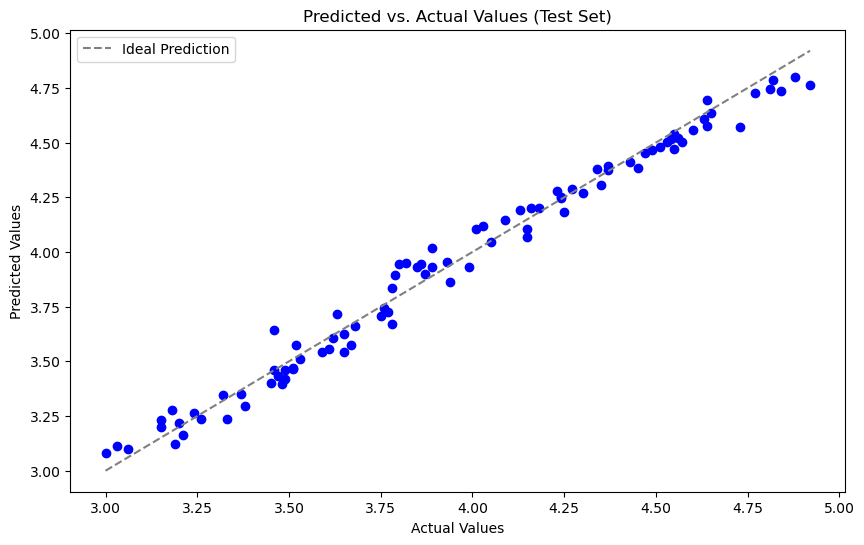

In [28]:
#Plotting the Actual values vs Predicted Value of the network

plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [29]:
#Computing various error metrics for comparative analysis

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.06701090789400312
RAE: 0.12415526674023512
MAE: 0.05555478790531986
R2: 0.9832235146518752


### Neural Network Training
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

In [30]:
x_reduced = data[['Temp min', 'Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced, x_reduced, y_train, y_ = train_test_split(x_reduced, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced, x_test_reduced, y_cv, y_test = train_test_split(x_reduced, y_, test_size=0.50, random_state=1)


In [31]:
scaler = StandardScaler()
x_train_scaled_reduced = scaler.fit_transform(x_train_reduced)
x_cv_scaled__reduced = scaler.transform(x_cv_reduced)
x_test_scaled_reduced = scaler.transform(x_test_reduced)

In [135]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 4ms/step - loss: 14.4080 - mae: 3.7188
Epoch 2/300
9/9 [==============================] - 0s 5ms/step - loss: 13.4502 - mae: 3.5910
Epoch 3/300
9/9 [==============================] - 0s 5ms/step - loss: 12.5288 - mae: 3.4629
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 11.6386 - mae: 3.3352
Epoch 5/300
9/9 [==============================] - 0s 6ms/step - loss: 10.7974 - mae: 3.2092
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 9.9792 - mae: 3.0825
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 9.1786 - mae: 2.9525
Epoch 8/300
9/9 [==============================] - 0s 5ms/step - loss: 8.4017 - mae: 2.8226
Epoch 9/300
9/9 [==============================] - 0s 4ms/step - loss: 7.6690 - mae: 2.6897
Epoch 10/300
9/9 [==============================] - 0s 6ms/step - loss: 6.9552 - mae: 2.5578
Epoch 11/300
9/9 [==============================] - 0s 6ms/step - loss: 6.

9/9 [==============================] - 0s 4ms/step - loss: 0.1910 - mae: 0.3385
Epoch 90/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1861 - mae: 0.3339
Epoch 91/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1809 - mae: 0.3296
Epoch 92/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1766 - mae: 0.3254
Epoch 93/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1727 - mae: 0.3222
Epoch 94/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1684 - mae: 0.3181
Epoch 95/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1641 - mae: 0.3141
Epoch 96/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1604 - mae: 0.3107
Epoch 97/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1569 - mae: 0.3075
Epoch 98/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1530 - mae: 0.3041
Epoch 99/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1493 - ma

9/9 [==============================] - 0s 8ms/step - loss: 0.0317 - mae: 0.1390
Epoch 177/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0314 - mae: 0.1382
Epoch 178/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0307 - mae: 0.1368
Epoch 179/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0304 - mae: 0.1362
Epoch 180/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0299 - mae: 0.1353
Epoch 181/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0295 - mae: 0.1344
Epoch 182/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0291 - mae: 0.1334
Epoch 183/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0287 - mae: 0.1327
Epoch 184/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0282 - mae: 0.1315
Epoch 185/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0279 - mae: 0.1309
Epoch 186/300
9/9 [==============================] - 0s 5ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 0.0160 - mae: 0.1009
Epoch 264/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0159 - mae: 0.1005
Epoch 265/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0159 - mae: 0.1004
Epoch 266/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0158 - mae: 0.1002
Epoch 267/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0157 - mae: 0.1001
Epoch 268/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0157 - mae: 0.1000
Epoch 269/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0156 - mae: 0.0996
Epoch 270/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0156 - mae: 0.0995
Epoch 271/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0155 - mae: 0.0995
Epoch 272/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0156 - mae: 0.1000
Epoch 273/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.8203 - mae: 0.6706
Epoch 51/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7903 - mae: 0.6558
Epoch 52/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7646 - mae: 0.6436
Epoch 53/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7396 - mae: 0.6312
Epoch 54/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7147 - mae: 0.6184
Epoch 55/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6924 - mae: 0.6066
Epoch 56/300
9/9 [==============================] - 0s 8ms/step - loss: 0.6690 - mae: 0.5940
Epoch 57/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6464 - mae: 0.5821
Epoch 58/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6254 - mae: 0.5709
Epoch 59/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6049 - mae: 0.5606
Epoch 60/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5851 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.1234 - mae: 0.1942
Epoch 138/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1220 - mae: 0.1926
Epoch 139/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1204 - mae: 0.1905
Epoch 140/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1189 - mae: 0.1885
Epoch 141/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1176 - mae: 0.1864
Epoch 142/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1161 - mae: 0.1843
Epoch 143/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1148 - mae: 0.1828
Epoch 144/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1136 - mae: 0.1813
Epoch 145/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1121 - mae: 0.1794
Epoch 146/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1110 - mae: 0.1775
Epoch 147/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0600 - mae: 0.1112
Epoch 225/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0597 - mae: 0.1108
Epoch 226/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0594 - mae: 0.1105
Epoch 227/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0591 - mae: 0.1103
Epoch 228/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0587 - mae: 0.1100
Epoch 229/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0585 - mae: 0.1096
Epoch 230/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0581 - mae: 0.1093
Epoch 231/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0578 - mae: 0.1090
Epoch 232/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0575 - mae: 0.1087
Epoch 233/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0571 - mae: 0.1084
Epoch 234/300
9/9 [==============================] - 0s 4ms/step - loss: 

9/9 [==============================] - 0s 4ms/step - loss: 10.6486 - mae: 2.9119
Epoch 12/300
9/9 [==============================] - 0s 4ms/step - loss: 10.0580 - mae: 2.8160
Epoch 13/300
9/9 [==============================] - 0s 5ms/step - loss: 9.5047 - mae: 2.7255
Epoch 14/300
9/9 [==============================] - 0s 6ms/step - loss: 8.9454 - mae: 2.6369
Epoch 15/300
9/9 [==============================] - 0s 4ms/step - loss: 8.4087 - mae: 2.5483
Epoch 16/300
9/9 [==============================] - 0s 4ms/step - loss: 7.8717 - mae: 2.4611
Epoch 17/300
9/9 [==============================] - 0s 4ms/step - loss: 7.3363 - mae: 2.3725
Epoch 18/300
9/9 [==============================] - 0s 4ms/step - loss: 6.8057 - mae: 2.2839
Epoch 19/300
9/9 [==============================] - 0s 5ms/step - loss: 6.3029 - mae: 2.1952
Epoch 20/300
9/9 [==============================] - 0s 4ms/step - loss: 5.7976 - mae: 2.1033
Epoch 21/300
9/9 [==============================] - 0s 4ms/step - loss: 5.3058 - 

9/9 [==============================] - 0s 4ms/step - loss: 0.2228 - mae: 0.1926
Epoch 100/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2194 - mae: 0.1892
Epoch 101/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2162 - mae: 0.1867
Epoch 102/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2130 - mae: 0.1843
Epoch 103/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2101 - mae: 0.1819
Epoch 104/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2072 - mae: 0.1797
Epoch 105/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2045 - mae: 0.1773
Epoch 106/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2016 - mae: 0.1749
Epoch 107/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1989 - mae: 0.1728
Epoch 108/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1963 - mae: 0.1711
Epoch 109/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0888 - mae: 0.1116
Epoch 187/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0881 - mae: 0.1116
Epoch 188/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0871 - mae: 0.1109
Epoch 189/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0862 - mae: 0.1103
Epoch 190/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0853 - mae: 0.1101
Epoch 191/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0845 - mae: 0.1096
Epoch 192/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0836 - mae: 0.1093
Epoch 193/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0829 - mae: 0.1089
Epoch 194/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0820 - mae: 0.1086
Epoch 195/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0812 - mae: 0.1082
Epoch 196/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0416 - mae: 0.0972
Epoch 274/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0412 - mae: 0.0971
Epoch 275/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0409 - mae: 0.0968
Epoch 276/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0406 - mae: 0.0967
Epoch 277/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0403 - mae: 0.0970
Epoch 278/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0400 - mae: 0.0971
Epoch 279/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0397 - mae: 0.0969
Epoch 280/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0395 - mae: 0.0972
Epoch 281/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0392 - mae: 0.0968
Epoch 282/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0389 - mae: 0.0966
Epoch 283/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 1.2659 - mae: 0.6214
Epoch 61/300
9/9 [==============================] - 0s 4ms/step - loss: 1.2359 - mae: 0.6105
Epoch 62/300
9/9 [==============================] - 0s 5ms/step - loss: 1.2063 - mae: 0.5998
Epoch 63/300
9/9 [==============================] - 0s 5ms/step - loss: 1.1766 - mae: 0.5890
Epoch 64/300
9/9 [==============================] - 0s 6ms/step - loss: 1.1487 - mae: 0.5793
Epoch 65/300
9/9 [==============================] - 0s 6ms/step - loss: 1.1198 - mae: 0.5689
Epoch 66/300
9/9 [==============================] - 0s 8ms/step - loss: 1.0921 - mae: 0.5582
Epoch 67/300
9/9 [==============================] - 0s 5ms/step - loss: 1.0656 - mae: 0.5482
Epoch 68/300
9/9 [==============================] - 0s 5ms/step - loss: 1.0383 - mae: 0.5377
Epoch 69/300
9/9 [==============================] - 0s 6ms/step - loss: 1.0129 - mae: 0.5285
Epoch 70/300
9/9 [==============================] - 0s 5ms/step - loss: 0.9872 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.1738 - mae: 0.1548
Epoch 148/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1706 - mae: 0.1529
Epoch 149/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1677 - mae: 0.1519
Epoch 150/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1649 - mae: 0.1511
Epoch 151/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1621 - mae: 0.1500
Epoch 152/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1592 - mae: 0.1485
Epoch 153/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1563 - mae: 0.1471
Epoch 154/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1536 - mae: 0.1461
Epoch 155/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1512 - mae: 0.1454
Epoch 156/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1486 - mae: 0.1443
Epoch 157/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0482 - mae: 0.1174
Epoch 235/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0477 - mae: 0.1174
Epoch 236/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0473 - mae: 0.1176
Epoch 237/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0467 - mae: 0.1172
Epoch 238/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0462 - mae: 0.1170
Epoch 239/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0457 - mae: 0.1170
Epoch 240/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0452 - mae: 0.1169
Epoch 241/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0448 - mae: 0.1168
Epoch 242/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0443 - mae: 0.1167
Epoch 243/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0439 - mae: 0.1168
Epoch 244/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 8ms/step - loss: 7.9202 - mae: 2.5349
Epoch 22/300
9/9 [==============================] - 0s 5ms/step - loss: 7.4979 - mae: 2.4377
Epoch 23/300
9/9 [==============================] - 0s 5ms/step - loss: 7.1002 - mae: 2.3415
Epoch 24/300
9/9 [==============================] - 0s 4ms/step - loss: 6.7357 - mae: 2.2476
Epoch 25/300
9/9 [==============================] - 0s 4ms/step - loss: 6.3886 - mae: 2.1557
Epoch 26/300
9/9 [==============================] - 0s 4ms/step - loss: 6.0721 - mae: 2.0706
Epoch 27/300
9/9 [==============================] - 0s 4ms/step - loss: 5.7839 - mae: 1.9895
Epoch 28/300
9/9 [==============================] - 0s 5ms/step - loss: 5.5163 - mae: 1.9170
Epoch 29/300
9/9 [==============================] - 0s 4ms/step - loss: 5.2670 - mae: 1.8480
Epoch 30/300
9/9 [==============================] - 0s 4ms/step - loss: 5.0353 - mae: 1.7835
Epoch 31/300
9/9 [==============================] - 0s 4ms/step - loss: 4.8221 - ma

9/9 [==============================] - 0s 9ms/step - loss: 0.3682 - mae: 0.2246
Epoch 110/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3587 - mae: 0.2208
Epoch 111/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3497 - mae: 0.2171
Epoch 112/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3410 - mae: 0.2139
Epoch 113/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3325 - mae: 0.2106
Epoch 114/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3241 - mae: 0.2072
Epoch 115/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3162 - mae: 0.2043
Epoch 116/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3083 - mae: 0.2013
Epoch 117/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3006 - mae: 0.1979
Epoch 118/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2931 - mae: 0.1947
Epoch 119/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.0612 - mae: 0.1159
Epoch 197/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0603 - mae: 0.1159
Epoch 198/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0594 - mae: 0.1160
Epoch 199/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0586 - mae: 0.1159
Epoch 200/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0577 - mae: 0.1156
Epoch 201/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0569 - mae: 0.1155
Epoch 202/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0561 - mae: 0.1154
Epoch 203/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0553 - mae: 0.1154
Epoch 204/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0545 - mae: 0.1153
Epoch 205/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0537 - mae: 0.1151
Epoch 206/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0327 - mae: 0.1167
Epoch 284/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0328 - mae: 0.1172
Epoch 285/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0326 - mae: 0.1169
Epoch 286/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0325 - mae: 0.1169
Epoch 287/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0324 - mae: 0.1170
Epoch 288/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0324 - mae: 0.1170
Epoch 289/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0324 - mae: 0.1174
Epoch 290/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0323 - mae: 0.1173
Epoch 291/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0322 - mae: 0.1171
Epoch 292/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0322 - mae: 0.1171
Epoch 293/300
9/9 [==============================] - 0s 5ms/step - loss: 

9/9 [==============================] - 0s 4ms/step - loss: 0.8151 - mae: 0.2946
Epoch 71/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7836 - mae: 0.2844
Epoch 72/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7533 - mae: 0.2757
Epoch 73/300
9/9 [==============================] - 0s 10ms/step - loss: 0.7244 - mae: 0.2675
Epoch 74/300
9/9 [==============================] - 0s 8ms/step - loss: 0.6962 - mae: 0.2590
Epoch 75/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6691 - mae: 0.2504
Epoch 76/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6438 - mae: 0.2434
Epoch 77/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6188 - mae: 0.2356
Epoch 78/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5952 - mae: 0.2286
Epoch 79/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5726 - mae: 0.2224
Epoch 80/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5509 - m

9/9 [==============================] - 0s 4ms/step - loss: 0.0534 - mae: 0.1258
Epoch 158/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0524 - mae: 0.1252
Epoch 159/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0515 - mae: 0.1248
Epoch 160/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0506 - mae: 0.1246
Epoch 161/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0497 - mae: 0.1242
Epoch 162/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0489 - mae: 0.1238
Epoch 163/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0481 - mae: 0.1235
Epoch 164/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0473 - mae: 0.1234
Epoch 165/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0466 - mae: 0.1232
Epoch 166/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0459 - mae: 0.1233
Epoch 167/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 8ms/step - loss: 0.0331 - mae: 0.1193
Epoch 245/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0331 - mae: 0.1194
Epoch 246/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0330 - mae: 0.1194
Epoch 247/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0331 - mae: 0.1194
Epoch 248/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0330 - mae: 0.1194
Epoch 249/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0331 - mae: 0.1195
Epoch 250/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0330 - mae: 0.1194
Epoch 251/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0331 - mae: 0.1196
Epoch 252/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0330 - mae: 0.1194
Epoch 253/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0330 - mae: 0.1194
Epoch 254/300
9/9 [==============================] - 0s 5ms/step - loss: 0

In [136]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 5ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.01
Model 6: Training MSE: 0.01, CV MSE: 0.01


In [137]:
# Select the model with the lowest CV MSE
model_num = 6

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 6ms/step
Selected Model: 6
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [138]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame to compare the results of the prediction to the actual value
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.87          3.871706
1           3.86          4.151582
2           3.62          3.555244
3           3.52          3.675930
4           3.68          3.650948
5           4.45          4.335013
6           4.55          4.475939

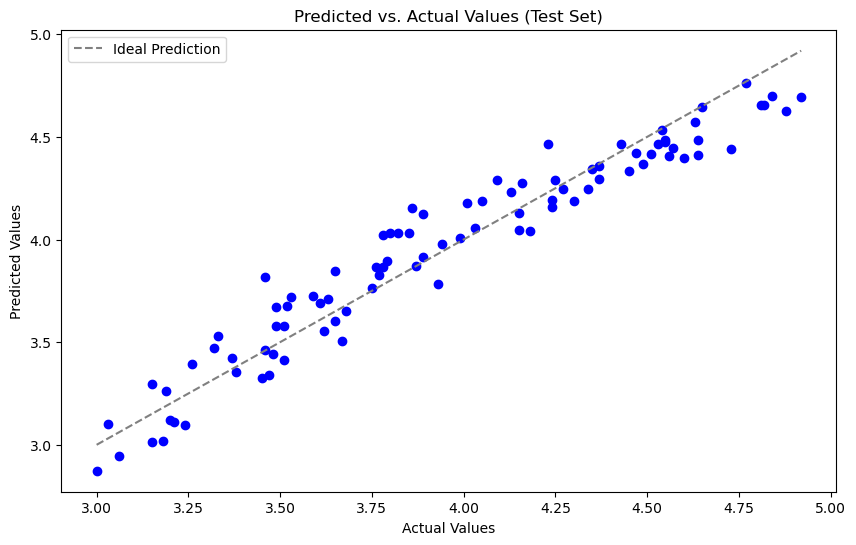

In [139]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13668015584290902
RAE: 0.25441572196119777
MAE: 0.11384141683578491
R2: 0.9302055469004169


### Neural Network Training
### Model 3: Three input features: Temp max, Sun hours and Solar rad

In [141]:
x_reduced2 = data[['Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced2, x_reduced2, y_train, y_ = train_test_split(x_reduced2, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced2, x_test_reduced2, y_cv, y_test = train_test_split(x_reduced2, y_, test_size=0.50, random_state=1)


In [47]:
scaler = StandardScaler()
x_train_scaled_reduced2 = scaler.fit_transform(x_train_reduced2)
x_cv_scaled__reduced2 = scaler.transform(x_cv_reduced2)
x_test_scaled_reduced2 = scaler.transform(x_test_reduced2)

In [143]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced2, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 2s 6ms/step - loss: 12.7156 - mae: 3.5395
Epoch 2/300
9/9 [==============================] - 0s 11ms/step - loss: 11.8392 - mae: 3.4154
Epoch 3/300
9/9 [==============================] - 0s 4ms/step - loss: 11.0196 - mae: 3.2947
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 10.2240 - mae: 3.1723
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 9.4484 - mae: 3.0480
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 8.7152 - mae: 2.9244
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 8.0123 - mae: 2.7997
Epoch 8/300
9/9 [==============================] - 0s 8ms/step - loss: 7.3335 - mae: 2.6734
Epoch 9/300
9/9 [==============================] - 0s 8ms/step - loss: 6.6876 - mae: 2.5456
Epoch 10/300
9/9 [==============================] - 0s 5ms/step - loss: 6.0800 - mae: 2.4185
Epoch 11/300
9/9 [==============================] - 0s 7ms/step - loss: 5.

9/9 [==============================] - 0s 5ms/step - loss: 0.1509 - mae: 0.3002
Epoch 90/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1473 - mae: 0.2965
Epoch 91/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1443 - mae: 0.2932
Epoch 92/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1411 - mae: 0.2901
Epoch 93/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1380 - mae: 0.2869
Epoch 94/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1351 - mae: 0.2834
Epoch 95/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1323 - mae: 0.2804
Epoch 96/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1295 - mae: 0.2773
Epoch 97/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1269 - mae: 0.2744
Epoch 98/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1240 - mae: 0.2713
Epoch 99/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1214 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.0290 - mae: 0.1355
Epoch 177/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0286 - mae: 0.1347
Epoch 178/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0284 - mae: 0.1341
Epoch 179/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0281 - mae: 0.1336
Epoch 180/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0279 - mae: 0.1331
Epoch 181/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0275 - mae: 0.1324
Epoch 182/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0272 - mae: 0.1318
Epoch 183/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0271 - mae: 0.1312
Epoch 184/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0267 - mae: 0.1304
Epoch 185/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0265 - mae: 0.1300
Epoch 186/300
9/9 [==============================] - 0s 8ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0187 - mae: 0.1102
Epoch 264/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0188 - mae: 0.1104
Epoch 265/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0187 - mae: 0.1103
Epoch 266/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0186 - mae: 0.1098
Epoch 267/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0185 - mae: 0.1098
Epoch 268/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0185 - mae: 0.1097
Epoch 269/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0184 - mae: 0.1095
Epoch 270/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0184 - mae: 0.1094
Epoch 271/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0184 - mae: 0.1092
Epoch 272/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0184 - mae: 0.1092
Epoch 273/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.6810 - mae: 0.6177
Epoch 51/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6574 - mae: 0.6051
Epoch 52/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6351 - mae: 0.5929
Epoch 53/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6144 - mae: 0.5817
Epoch 54/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5926 - mae: 0.5703
Epoch 55/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5725 - mae: 0.5594
Epoch 56/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5530 - mae: 0.5477
Epoch 57/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5346 - mae: 0.5366
Epoch 58/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5176 - mae: 0.5271
Epoch 59/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5001 - mae: 0.5171
Epoch 60/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4834 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.0911 - mae: 0.1608
Epoch 138/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0900 - mae: 0.1593
Epoch 139/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0891 - mae: 0.1579
Epoch 140/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0881 - mae: 0.1563
Epoch 141/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0872 - mae: 0.1551
Epoch 142/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0863 - mae: 0.1539
Epoch 143/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0855 - mae: 0.1527
Epoch 144/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0847 - mae: 0.1517
Epoch 145/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0841 - mae: 0.1510
Epoch 146/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0832 - mae: 0.1495
Epoch 147/300
9/9 [==============================] - 0s 4ms/step - loss: 

9/9 [==============================] - 0s 4ms/step - loss: 0.0540 - mae: 0.1157
Epoch 225/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0538 - mae: 0.1155
Epoch 226/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0537 - mae: 0.1154
Epoch 227/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0534 - mae: 0.1152
Epoch 228/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0532 - mae: 0.1152
Epoch 229/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0530 - mae: 0.1149
Epoch 230/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0528 - mae: 0.1146
Epoch 231/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0526 - mae: 0.1146
Epoch 232/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0524 - mae: 0.1143
Epoch 233/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0522 - mae: 0.1142
Epoch 234/300
9/9 [==============================] - 0s 8ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 7.8764 - mae: 2.7583
Epoch 12/300
9/9 [==============================] - 0s 4ms/step - loss: 7.2808 - mae: 2.6438
Epoch 13/300
9/9 [==============================] - 0s 4ms/step - loss: 6.7179 - mae: 2.5278
Epoch 14/300
9/9 [==============================] - 0s 4ms/step - loss: 6.1841 - mae: 2.4150
Epoch 15/300
9/9 [==============================] - 0s 4ms/step - loss: 5.6741 - mae: 2.2986
Epoch 16/300
9/9 [==============================] - 0s 4ms/step - loss: 5.1952 - mae: 2.1823
Epoch 17/300
9/9 [==============================] - 0s 4ms/step - loss: 4.7482 - mae: 2.0671
Epoch 18/300
9/9 [==============================] - 0s 4ms/step - loss: 4.3321 - mae: 1.9523
Epoch 19/300
9/9 [==============================] - 0s 5ms/step - loss: 3.9506 - mae: 1.8390
Epoch 20/300
9/9 [==============================] - 0s 4ms/step - loss: 3.6006 - mae: 1.7287
Epoch 21/300
9/9 [==============================] - 0s 5ms/step - loss: 3.2843 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.2513 - mae: 0.2759
Epoch 100/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2472 - mae: 0.2723
Epoch 101/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2429 - mae: 0.2686
Epoch 102/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2388 - mae: 0.2651
Epoch 103/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2349 - mae: 0.2618
Epoch 104/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2311 - mae: 0.2586
Epoch 105/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2274 - mae: 0.2553
Epoch 106/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2235 - mae: 0.2521
Epoch 107/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2202 - mae: 0.2492
Epoch 108/300
9/9 [==============================] - 0s 11ms/step - loss: 0.2165 - mae: 0.2461
Epoch 109/300
9/9 [==============================] - 0s 5ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 0.0863 - mae: 0.1270
Epoch 187/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0856 - mae: 0.1265
Epoch 188/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0848 - mae: 0.1258
Epoch 189/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0841 - mae: 0.1254
Epoch 190/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0833 - mae: 0.1248
Epoch 191/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0825 - mae: 0.1243
Epoch 192/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0819 - mae: 0.1242
Epoch 193/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0811 - mae: 0.1235
Epoch 194/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0804 - mae: 0.1228
Epoch 195/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0797 - mae: 0.1222
Epoch 196/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.0445 - mae: 0.1064
Epoch 274/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0442 - mae: 0.1062
Epoch 275/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0439 - mae: 0.1064
Epoch 276/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0437 - mae: 0.1063
Epoch 277/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0434 - mae: 0.1065
Epoch 278/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0431 - mae: 0.1063
Epoch 279/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0429 - mae: 0.1060
Epoch 280/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0426 - mae: 0.1059
Epoch 281/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0424 - mae: 0.1063
Epoch 282/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0421 - mae: 0.1063
Epoch 283/300
9/9 [==============================] - 0s 5ms/step - loss: 

9/9 [==============================] - 0s 4ms/step - loss: 0.5782 - mae: 0.3536
Epoch 61/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5586 - mae: 0.3437
Epoch 62/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5407 - mae: 0.3348
Epoch 63/300
9/9 [==============================] - 0s 7ms/step - loss: 0.5232 - mae: 0.3256
Epoch 64/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5069 - mae: 0.3169
Epoch 65/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4907 - mae: 0.3078
Epoch 66/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4761 - mae: 0.3002
Epoch 67/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4617 - mae: 0.2924
Epoch 68/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4481 - mae: 0.2850
Epoch 69/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4350 - mae: 0.2778
Epoch 70/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4225 - ma

9/9 [==============================] - 0s 7ms/step - loss: 0.0961 - mae: 0.1260
Epoch 148/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0948 - mae: 0.1255
Epoch 149/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0935 - mae: 0.1251
Epoch 150/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0922 - mae: 0.1247
Epoch 151/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0910 - mae: 0.1246
Epoch 152/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0898 - mae: 0.1243
Epoch 153/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0885 - mae: 0.1236
Epoch 154/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0873 - mae: 0.1235
Epoch 155/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0861 - mae: 0.1227
Epoch 156/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0849 - mae: 0.1222
Epoch 157/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0375 - mae: 0.1127
Epoch 235/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0374 - mae: 0.1136
Epoch 236/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0370 - mae: 0.1132
Epoch 237/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0368 - mae: 0.1128
Epoch 238/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0366 - mae: 0.1129
Epoch 239/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0363 - mae: 0.1132
Epoch 240/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0361 - mae: 0.1134
Epoch 241/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0359 - mae: 0.1132
Epoch 242/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0358 - mae: 0.1137
Epoch 243/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0355 - mae: 0.1131
Epoch 244/300
9/9 [==============================] - 0s 7ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 3.6490 - mae: 1.3742
Epoch 22/300
9/9 [==============================] - 0s 5ms/step - loss: 3.4303 - mae: 1.2866
Epoch 23/300
9/9 [==============================] - 0s 4ms/step - loss: 3.2409 - mae: 1.2093
Epoch 24/300
9/9 [==============================] - 0s 5ms/step - loss: 3.0779 - mae: 1.1426
Epoch 25/300
9/9 [==============================] - 0s 5ms/step - loss: 2.9373 - mae: 1.0855
Epoch 26/300
9/9 [==============================] - 0s 5ms/step - loss: 2.8114 - mae: 1.0343
Epoch 27/300
9/9 [==============================] - 0s 5ms/step - loss: 2.7075 - mae: 0.9913
Epoch 28/300
9/9 [==============================] - 0s 4ms/step - loss: 2.6097 - mae: 0.9532
Epoch 29/300
9/9 [==============================] - 0s 7ms/step - loss: 2.5216 - mae: 0.9189
Epoch 30/300
9/9 [==============================] - 0s 10ms/step - loss: 2.4426 - mae: 0.8905
Epoch 31/300
9/9 [==============================] - 0s 7ms/step - loss: 2.3654 - m

9/9 [==============================] - 0s 5ms/step - loss: 0.2121 - mae: 0.1609
Epoch 110/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2065 - mae: 0.1596
Epoch 111/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2011 - mae: 0.1582
Epoch 112/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1957 - mae: 0.1566
Epoch 113/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1907 - mae: 0.1555
Epoch 114/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1858 - mae: 0.1545
Epoch 115/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1809 - mae: 0.1529
Epoch 116/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1762 - mae: 0.1515
Epoch 117/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1716 - mae: 0.1504
Epoch 118/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1672 - mae: 0.1496
Epoch 119/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0367 - mae: 0.1216
Epoch 197/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0364 - mae: 0.1213
Epoch 198/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0361 - mae: 0.1211
Epoch 199/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0358 - mae: 0.1212
Epoch 200/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0355 - mae: 0.1214
Epoch 201/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0354 - mae: 0.1218
Epoch 202/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0350 - mae: 0.1214
Epoch 203/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0348 - mae: 0.1212
Epoch 204/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0345 - mae: 0.1212
Epoch 205/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0343 - mae: 0.1217
Epoch 206/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0289 - mae: 0.1230
Epoch 284/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0289 - mae: 0.1227
Epoch 285/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0288 - mae: 0.1227
Epoch 286/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0288 - mae: 0.1225
Epoch 287/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0288 - mae: 0.1228
Epoch 288/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0288 - mae: 0.1226
Epoch 289/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0289 - mae: 0.1226
Epoch 290/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0288 - mae: 0.1224
Epoch 291/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0288 - mae: 0.1228
Epoch 292/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0287 - mae: 0.1227
Epoch 293/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.4153 - mae: 0.1759
Epoch 71/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3998 - mae: 0.1739
Epoch 72/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3849 - mae: 0.1719
Epoch 73/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3706 - mae: 0.1696
Epoch 74/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3570 - mae: 0.1680
Epoch 75/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3440 - mae: 0.1662
Epoch 76/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3315 - mae: 0.1646
Epoch 77/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3194 - mae: 0.1628
Epoch 78/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3078 - mae: 0.1612
Epoch 79/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2968 - mae: 0.1597
Epoch 80/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2861 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.0415 - mae: 0.1266
Epoch 158/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0410 - mae: 0.1261
Epoch 159/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0408 - mae: 0.1267
Epoch 160/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0403 - mae: 0.1262
Epoch 161/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0400 - mae: 0.1263
Epoch 162/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0397 - mae: 0.1264
Epoch 163/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0394 - mae: 0.1262
Epoch 164/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0391 - mae: 0.1263
Epoch 165/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0388 - mae: 0.1262
Epoch 166/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0385 - mae: 0.1262
Epoch 167/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0331 - mae: 0.1255
Epoch 245/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0329 - mae: 0.1251
Epoch 246/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0330 - mae: 0.1248
Epoch 247/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0329 - mae: 0.1247
Epoch 248/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0330 - mae: 0.1251
Epoch 249/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0330 - mae: 0.1252
Epoch 250/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0329 - mae: 0.1249
Epoch 251/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0330 - mae: 0.1252
Epoch 252/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0329 - mae: 0.1248
Epoch 253/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0331 - mae: 0.1251
Epoch 254/300
9/9 [==============================] - 0s 5ms/step - loss: 0

In [144]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced2)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced2)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.01
Model 6: Training MSE: 0.01, CV MSE: 0.01


In [145]:
# Select the model with the lowest CV MSE
model_num = 6

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced2)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 22ms/step
Selected Model: 6
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [146]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.87          3.856233
1           3.86          4.115453
2           3.62          3.557588
3           3.52          3.651562
4           3.68          3.675576
5           4.45          4.332992
6           4.55          4.448401

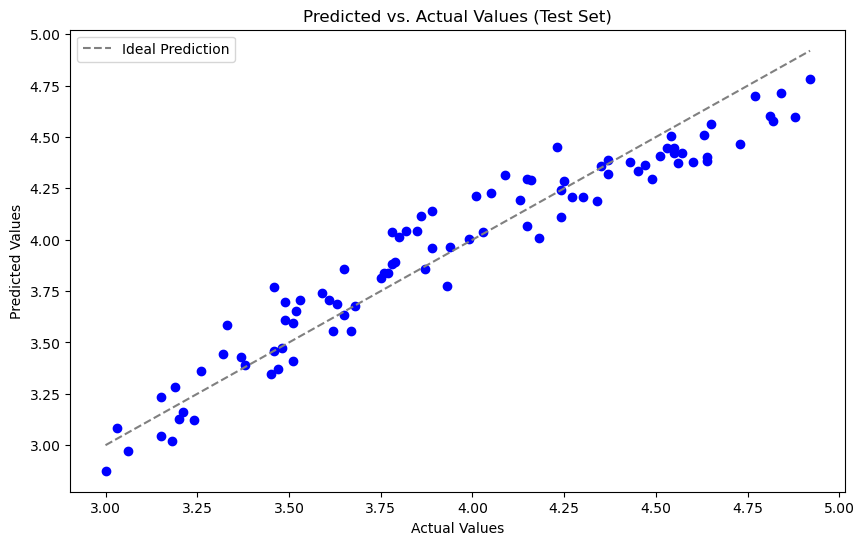

In [147]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [148]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.14313400553909417
RAE: 0.2702776490360929
MAE: 0.12093902950701506
R2: 0.9234587363539873


### Neural Network Training
### Model 4: Three input features: Temp min, Sun hours and Solar rad

In [149]:
x_reduced3 = data[['Sunlight hours','Solar Radiation', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced3, x_reduced3, y_train, y_ = train_test_split(x_reduced3, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced3, x_test_reduced3, y_cv, y_test = train_test_split(x_reduced3, y_, test_size=0.50, random_state=1)



In [150]:
scaler = StandardScaler()
x_train_scaled_reduced3 = scaler.fit_transform(x_train_reduced3)
x_cv_scaled__reduced3 = scaler.transform(x_cv_reduced3)
x_test_scaled_reduced3 = scaler.transform(x_test_reduced3)

In [151]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced3, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 4ms/step - loss: 18.5250 - mae: 4.2533
Epoch 2/300
9/9 [==============================] - 0s 5ms/step - loss: 17.6390 - mae: 4.1464
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 16.8138 - mae: 4.0429
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 16.0159 - mae: 3.9401
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 15.2731 - mae: 3.8415
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 14.5685 - mae: 3.7445
Epoch 7/300
9/9 [==============================] - 0s 4ms/step - loss: 13.8949 - mae: 3.6490
Epoch 8/300
9/9 [==============================] - 0s 4ms/step - loss: 13.2513 - mae: 3.5546
Epoch 9/300
9/9 [==============================] - 0s 5ms/step - loss: 12.6286 - mae: 3.4588
Epoch 10/300
9/9 [==============================] - 0s 5ms/step - loss: 12.0297 - mae: 3.3649
Epoch 11/300
9/9 [==============================] - 0s 5ms/step - los

9/9 [==============================] - 0s 15ms/step - loss: 0.1671 - mae: 0.3294
Epoch 90/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1617 - mae: 0.3237
Epoch 91/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1566 - mae: 0.3185
Epoch 92/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1517 - mae: 0.3132
Epoch 93/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1471 - mae: 0.3081
Epoch 94/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1427 - mae: 0.3031
Epoch 95/300
9/9 [==============================] - 1s 76ms/step - loss: 0.1385 - mae: 0.2983
Epoch 96/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1344 - mae: 0.2937
Epoch 97/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1303 - mae: 0.2888
Epoch 98/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1268 - mae: 0.2846
Epoch 99/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1230 - 

9/9 [==============================] - 0s 4ms/step - loss: 0.0333 - mae: 0.1443
Epoch 177/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0332 - mae: 0.1441
Epoch 178/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0328 - mae: 0.1430
Epoch 179/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0325 - mae: 0.1426
Epoch 180/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0322 - mae: 0.1420
Epoch 181/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0320 - mae: 0.1413
Epoch 182/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0317 - mae: 0.1409
Epoch 183/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0315 - mae: 0.1403
Epoch 184/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0313 - mae: 0.1400
Epoch 185/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0312 - mae: 0.1396
Epoch 186/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0233 - mae: 0.1205
Epoch 264/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0233 - mae: 0.1205
Epoch 265/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0232 - mae: 0.1203
Epoch 266/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0232 - mae: 0.1203
Epoch 267/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0231 - mae: 0.1201
Epoch 268/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0231 - mae: 0.1201
Epoch 269/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0231 - mae: 0.1198
Epoch 270/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0230 - mae: 0.1197
Epoch 271/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0230 - mae: 0.1197
Epoch 272/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0231 - mae: 0.1199
Epoch 273/300
9/9 [==============================] - 0s 6ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 0.5407 - mae: 0.5485
Epoch 51/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5191 - mae: 0.5361
Epoch 52/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4994 - mae: 0.5236
Epoch 53/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4808 - mae: 0.5125
Epoch 54/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4634 - mae: 0.5013
Epoch 55/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4468 - mae: 0.4904
Epoch 56/300
9/9 [==============================] - 0s 10ms/step - loss: 0.4321 - mae: 0.4803
Epoch 57/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4170 - mae: 0.4701
Epoch 58/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4033 - mae: 0.4599
Epoch 59/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3899 - mae: 0.4500
Epoch 60/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3775 - m

9/9 [==============================] - 0s 5ms/step - loss: 0.0995 - mae: 0.1824
Epoch 138/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0985 - mae: 0.1811
Epoch 139/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0975 - mae: 0.1797
Epoch 140/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0966 - mae: 0.1784
Epoch 141/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0957 - mae: 0.1773
Epoch 142/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0948 - mae: 0.1762
Epoch 143/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0938 - mae: 0.1748
Epoch 144/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0931 - mae: 0.1743
Epoch 145/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0921 - mae: 0.1727
Epoch 146/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0912 - mae: 0.1715
Epoch 147/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0558 - mae: 0.1244
Epoch 225/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0555 - mae: 0.1238
Epoch 226/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0553 - mae: 0.1235
Epoch 227/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0551 - mae: 0.1234
Epoch 228/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0548 - mae: 0.1232
Epoch 229/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0547 - mae: 0.1230
Epoch 230/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0544 - mae: 0.1228
Epoch 231/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0542 - mae: 0.1223
Epoch 232/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0539 - mae: 0.1220
Epoch 233/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0538 - mae: 0.1218
Epoch 234/300
9/9 [==============================] - 0s 6ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 8.4356 - mae: 2.7242
Epoch 12/300
9/9 [==============================] - 0s 6ms/step - loss: 7.8317 - mae: 2.6086
Epoch 13/300
9/9 [==============================] - 0s 6ms/step - loss: 7.2358 - mae: 2.4959
Epoch 14/300
9/9 [==============================] - 0s 11ms/step - loss: 6.6861 - mae: 2.3840
Epoch 15/300
9/9 [==============================] - 0s 7ms/step - loss: 6.1773 - mae: 2.2775
Epoch 16/300
9/9 [==============================] - 0s 7ms/step - loss: 5.6907 - mae: 2.1692
Epoch 17/300
9/9 [==============================] - 0s 6ms/step - loss: 5.2364 - mae: 2.0657
Epoch 18/300
9/9 [==============================] - 0s 9ms/step - loss: 4.8085 - mae: 1.9651
Epoch 19/300
9/9 [==============================] - 0s 7ms/step - loss: 4.4209 - mae: 1.8669
Epoch 20/300
9/9 [==============================] - 0s 8ms/step - loss: 4.0600 - mae: 1.7731
Epoch 21/300
9/9 [==============================] - 0s 6ms/step - loss: 3.7272 - m

9/9 [==============================] - 0s 9ms/step - loss: 0.2622 - mae: 0.2572
Epoch 100/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2578 - mae: 0.2533
Epoch 101/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2538 - mae: 0.2498
Epoch 102/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2499 - mae: 0.2462
Epoch 103/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2462 - mae: 0.2429
Epoch 104/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2424 - mae: 0.2399
Epoch 105/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2389 - mae: 0.2369
Epoch 106/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2352 - mae: 0.2335
Epoch 107/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2317 - mae: 0.2302
Epoch 108/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2289 - mae: 0.2277
Epoch 109/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.1048 - mae: 0.1294
Epoch 187/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1040 - mae: 0.1289
Epoch 188/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1031 - mae: 0.1282
Epoch 189/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1022 - mae: 0.1276
Epoch 190/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1014 - mae: 0.1272
Epoch 191/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1005 - mae: 0.1268
Epoch 192/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0997 - mae: 0.1261
Epoch 193/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0988 - mae: 0.1255
Epoch 194/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0980 - mae: 0.1251
Epoch 195/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0972 - mae: 0.1246
Epoch 196/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.0577 - mae: 0.1126
Epoch 274/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0573 - mae: 0.1122
Epoch 275/300
9/9 [==============================] - 0s 14ms/step - loss: 0.0570 - mae: 0.1126
Epoch 276/300
9/9 [==============================] - 0s 14ms/step - loss: 0.0567 - mae: 0.1126
Epoch 277/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0563 - mae: 0.1123
Epoch 278/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0560 - mae: 0.1123
Epoch 279/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0557 - mae: 0.1123
Epoch 280/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0556 - mae: 0.1128
Epoch 281/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0550 - mae: 0.1123
Epoch 282/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0548 - mae: 0.1124
Epoch 283/300
9/9 [==============================] - 0s 6ms/step - lo

9/9 [==============================] - 0s 4ms/step - loss: 0.6384 - mae: 0.3624
Epoch 61/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6201 - mae: 0.3537
Epoch 62/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6023 - mae: 0.3452
Epoch 63/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5844 - mae: 0.3365
Epoch 64/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5680 - mae: 0.3282
Epoch 65/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5515 - mae: 0.3196
Epoch 66/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5359 - mae: 0.3112
Epoch 67/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5211 - mae: 0.3041
Epoch 68/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5064 - mae: 0.2962
Epoch 69/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4924 - mae: 0.2888
Epoch 70/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4788 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.0983 - mae: 0.1206
Epoch 148/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0969 - mae: 0.1202
Epoch 149/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0956 - mae: 0.1202
Epoch 150/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0942 - mae: 0.1200
Epoch 151/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0928 - mae: 0.1197
Epoch 152/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0915 - mae: 0.1197
Epoch 153/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0902 - mae: 0.1195
Epoch 154/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0889 - mae: 0.1193
Epoch 155/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0877 - mae: 0.1196
Epoch 156/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0864 - mae: 0.1193
Epoch 157/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0408 - mae: 0.1210
Epoch 235/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0406 - mae: 0.1213
Epoch 236/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0403 - mae: 0.1209
Epoch 237/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0401 - mae: 0.1214
Epoch 238/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0398 - mae: 0.1212
Epoch 239/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0396 - mae: 0.1211
Epoch 240/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0394 - mae: 0.1213
Epoch 241/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0393 - mae: 0.1212
Epoch 242/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0389 - mae: 0.1210
Epoch 243/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0388 - mae: 0.1215
Epoch 244/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 3.5040 - mae: 1.3467
Epoch 22/300
9/9 [==============================] - 0s 4ms/step - loss: 3.2964 - mae: 1.2775
Epoch 23/300
9/9 [==============================] - 0s 4ms/step - loss: 3.1177 - mae: 1.2176
Epoch 24/300
9/9 [==============================] - 0s 4ms/step - loss: 2.9472 - mae: 1.1589
Epoch 25/300
9/9 [==============================] - 0s 4ms/step - loss: 2.7999 - mae: 1.1080
Epoch 26/300
9/9 [==============================] - 0s 5ms/step - loss: 2.6594 - mae: 1.0586
Epoch 27/300
9/9 [==============================] - 0s 5ms/step - loss: 2.5354 - mae: 1.0164
Epoch 28/300
9/9 [==============================] - 0s 6ms/step - loss: 2.4174 - mae: 0.9763
Epoch 29/300
9/9 [==============================] - 0s 5ms/step - loss: 2.3086 - mae: 0.9405
Epoch 30/300
9/9 [==============================] - 0s 6ms/step - loss: 2.2086 - mae: 0.9067
Epoch 31/300
9/9 [==============================] - 0s 5ms/step - loss: 2.1133 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.1271 - mae: 0.1288
Epoch 110/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1237 - mae: 0.1276
Epoch 111/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1205 - mae: 0.1269
Epoch 112/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1173 - mae: 0.1259
Epoch 113/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1144 - mae: 0.1252
Epoch 114/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1116 - mae: 0.1245
Epoch 115/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1088 - mae: 0.1241
Epoch 116/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1062 - mae: 0.1235
Epoch 117/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1036 - mae: 0.1229
Epoch 118/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1012 - mae: 0.1223
Epoch 119/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0381 - mae: 0.1255
Epoch 197/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0379 - mae: 0.1254
Epoch 198/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0377 - mae: 0.1254
Epoch 199/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0376 - mae: 0.1253
Epoch 200/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0374 - mae: 0.1254
Epoch 201/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0373 - mae: 0.1256
Epoch 202/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0371 - mae: 0.1253
Epoch 203/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0370 - mae: 0.1254
Epoch 204/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0370 - mae: 0.1255
Epoch 205/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0368 - mae: 0.1257
Epoch 206/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0341 - mae: 0.1254
Epoch 284/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0340 - mae: 0.1253
Epoch 285/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0340 - mae: 0.1261
Epoch 286/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0340 - mae: 0.1258
Epoch 287/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0343 - mae: 0.1260
Epoch 288/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0339 - mae: 0.1259
Epoch 289/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0341 - mae: 0.1262
Epoch 290/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0340 - mae: 0.1252
Epoch 291/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0342 - mae: 0.1262
Epoch 292/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0340 - mae: 0.1257
Epoch 293/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.2984 - mae: 0.1468
Epoch 71/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2855 - mae: 0.1450
Epoch 72/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2732 - mae: 0.1433
Epoch 73/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2616 - mae: 0.1418
Epoch 74/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2507 - mae: 0.1407
Epoch 75/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2405 - mae: 0.1397
Epoch 76/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2306 - mae: 0.1385
Epoch 77/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2214 - mae: 0.1375
Epoch 78/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2127 - mae: 0.1367
Epoch 79/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2046 - mae: 0.1361
Epoch 80/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1969 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.0464 - mae: 0.1312
Epoch 158/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0461 - mae: 0.1313
Epoch 159/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0460 - mae: 0.1314
Epoch 160/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0459 - mae: 0.1314
Epoch 161/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0457 - mae: 0.1311
Epoch 162/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0455 - mae: 0.1314
Epoch 163/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0454 - mae: 0.1314
Epoch 164/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0452 - mae: 0.1315
Epoch 165/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0450 - mae: 0.1313
Epoch 166/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0449 - mae: 0.1315
Epoch 167/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.0422 - mae: 0.1335
Epoch 245/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0419 - mae: 0.1319
Epoch 246/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0420 - mae: 0.1316
Epoch 247/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0419 - mae: 0.1316
Epoch 248/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0421 - mae: 0.1325
Epoch 249/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0420 - mae: 0.1319
Epoch 250/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0418 - mae: 0.1312
Epoch 251/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0418 - mae: 0.1319
Epoch 252/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0418 - mae: 0.1325
Epoch 253/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0418 - mae: 0.1317
Epoch 254/300
9/9 [==============================] - 0s 4ms/step - loss: 0

In [152]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced3)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced3)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 3ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.01
Model 6: Training MSE: 0.01, CV MSE: 0.01


In [153]:
# Select the model with the lowest CV MSE
model_num = 6

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced3)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 5ms/step
Selected Model: 6
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [154]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.87          3.906446
1           3.86          4.172904
2           3.62          3.595037
3           3.52          3.789112
4           3.68          3.754747
5           4.45          4.376681
6           4.55          4.464930

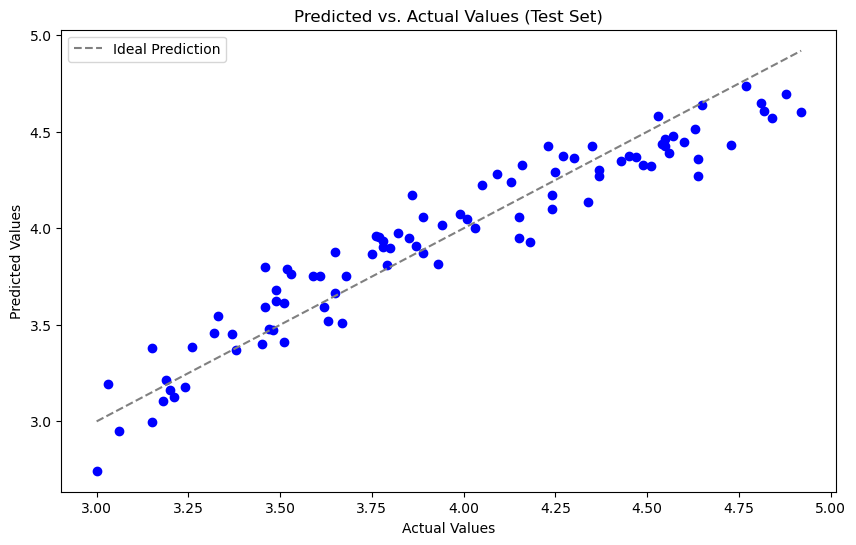

In [155]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [156]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.15587285901617645
RAE: 0.29560101532472016
MAE: 0.13227027851602308
R2: 0.9092281931165872


### Neural Network Training
### Model 5: Three input features: Temp min and max, Wind speed

In [157]:
x_reduced4 = data[['Temp max','Wind speed', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced4, x_reduced4, y_train, y_ = train_test_split(x_reduced4, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced4, x_test_reduced4, y_cv, y_test = train_test_split(x_reduced4, y_, test_size=0.50, random_state=1)


In [158]:
scaler = StandardScaler()
x_train_scaled_reduced4 = scaler.fit_transform(x_train_reduced4)
x_cv_scaled__reduced4 = scaler.transform(x_cv_reduced4)
x_test_scaled_reduced4 = scaler.transform(x_test_reduced4)

In [159]:
lambdas = [0, 0.01, 0.03, 0.5]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(32, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced4, y_train,
    epochs=250
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/250
9/9 [==============================] - 1s 4ms/step - loss: 17.4952 - mae: 4.1515
Epoch 2/250
9/9 [==============================] - 0s 5ms/step - loss: 16.3620 - mae: 4.0119
Epoch 3/250
9/9 [==============================] - 0s 4ms/step - loss: 15.2872 - mae: 3.8745
Epoch 4/250
9/9 [==============================] - 0s 8ms/step - loss: 14.3055 - mae: 3.7432
Epoch 5/250
9/9 [==============================] - 0s 6ms/step - loss: 13.3484 - mae: 3.6112
Epoch 6/250
9/9 [==============================] - 0s 5ms/step - loss: 12.4585 - mae: 3.4838
Epoch 7/250
9/9 [==============================] - 0s 6ms/step - loss: 11.6114 - mae: 3.3574
Epoch 8/250
9/9 [==============================] - 0s 6ms/step - loss: 10.8006 - mae: 3.2320
Epoch 9/250
9/9 [==============================] - 0s 5ms/step - loss: 10.0337 - mae: 3.1081
Epoch 10/250
9/9 [==============================] - 0s 6ms/step - loss: 9.3052 - mae: 2.9839
Epoch 11/250
9/9 [==============================] - 0s 6ms/step - loss

9/9 [==============================] - 0s 5ms/step - loss: 0.2817 - mae: 0.4239
Epoch 90/250
9/9 [==============================] - 0s 4ms/step - loss: 0.2736 - mae: 0.4178
Epoch 91/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2656 - mae: 0.4110
Epoch 92/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2585 - mae: 0.4050
Epoch 93/250
9/9 [==============================] - 0s 4ms/step - loss: 0.2511 - mae: 0.3990
Epoch 94/250
9/9 [==============================] - 0s 4ms/step - loss: 0.2441 - mae: 0.3930
Epoch 95/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2375 - mae: 0.3873
Epoch 96/250
9/9 [==============================] - 0s 6ms/step - loss: 0.2308 - mae: 0.3814
Epoch 97/250
9/9 [==============================] - 0s 7ms/step - loss: 0.2241 - mae: 0.3758
Epoch 98/250
9/9 [==============================] - 0s 6ms/step - loss: 0.2176 - mae: 0.3699
Epoch 99/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2115 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.0604 - mae: 0.1916
Epoch 177/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0602 - mae: 0.1909
Epoch 178/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0598 - mae: 0.1903
Epoch 179/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0595 - mae: 0.1899
Epoch 180/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0593 - mae: 0.1902
Epoch 181/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0588 - mae: 0.1897
Epoch 182/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0585 - mae: 0.1894
Epoch 183/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0582 - mae: 0.1887
Epoch 184/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0581 - mae: 0.1884
Epoch 185/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0577 - mae: 0.1876
Epoch 186/250
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 9ms/step - loss: 7.1904 - mae: 2.5480
Epoch 14/250
9/9 [==============================] - 0s 5ms/step - loss: 6.6827 - mae: 2.4445
Epoch 15/250
9/9 [==============================] - 0s 5ms/step - loss: 6.1877 - mae: 2.3413
Epoch 16/250
9/9 [==============================] - 0s 5ms/step - loss: 5.7246 - mae: 2.2403
Epoch 17/250
9/9 [==============================] - 0s 5ms/step - loss: 5.2797 - mae: 2.1389
Epoch 18/250
9/9 [==============================] - 0s 5ms/step - loss: 4.8550 - mae: 2.0364
Epoch 19/250
9/9 [==============================] - 0s 4ms/step - loss: 4.4482 - mae: 1.9359
Epoch 20/250
9/9 [==============================] - 0s 5ms/step - loss: 4.0636 - mae: 1.8343
Epoch 21/250
9/9 [==============================] - 0s 5ms/step - loss: 3.7079 - mae: 1.7372
Epoch 22/250
9/9 [==============================] - 0s 5ms/step - loss: 3.3698 - mae: 1.6401
Epoch 23/250
9/9 [==============================] - 0s 8ms/step - loss: 3.0603 - ma

9/9 [==============================] - 0s 11ms/step - loss: 0.2046 - mae: 0.2999
Epoch 102/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2010 - mae: 0.2966
Epoch 103/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1974 - mae: 0.2931
Epoch 104/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1939 - mae: 0.2899
Epoch 105/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1909 - mae: 0.2872
Epoch 106/250
9/9 [==============================] - 0s 7ms/step - loss: 0.1879 - mae: 0.2842
Epoch 107/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1848 - mae: 0.2812
Epoch 108/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1818 - mae: 0.2783
Epoch 109/250
9/9 [==============================] - 0s 8ms/step - loss: 0.1789 - mae: 0.2755
Epoch 110/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1760 - mae: 0.2726
Epoch 111/250
9/9 [==============================] - 0s 6ms/step - loss: 

9/9 [==============================] - 0s 12ms/step - loss: 0.0946 - mae: 0.1899
Epoch 188/250
9/9 [==============================] - 0s 16ms/step - loss: 0.0941 - mae: 0.1888
Epoch 189/250
9/9 [==============================] - 0s 15ms/step - loss: 0.0938 - mae: 0.1878
Epoch 190/250
9/9 [==============================] - 0s 9ms/step - loss: 0.0934 - mae: 0.1878
Epoch 191/250
9/9 [==============================] - 0s 10ms/step - loss: 0.0930 - mae: 0.1877
Epoch 192/250
9/9 [==============================] - 0s 9ms/step - loss: 0.0925 - mae: 0.1874
Epoch 193/250
9/9 [==============================] - 0s 10ms/step - loss: 0.0924 - mae: 0.1880
Epoch 194/250
9/9 [==============================] - 0s 8ms/step - loss: 0.0919 - mae: 0.1869
Epoch 195/250
9/9 [==============================] - 0s 7ms/step - loss: 0.0915 - mae: 0.1860
Epoch 196/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0911 - mae: 0.1855
Epoch 197/250
9/9 [==============================] - 0s 8ms/step - lo

9/9 [==============================] - 0s 5ms/step - loss: 1.5969 - mae: 0.9385
Epoch 25/250
9/9 [==============================] - 0s 5ms/step - loss: 1.4990 - mae: 0.9019
Epoch 26/250
9/9 [==============================] - 0s 7ms/step - loss: 1.4187 - mae: 0.8717
Epoch 27/250
9/9 [==============================] - 0s 6ms/step - loss: 1.3498 - mae: 0.8464
Epoch 28/250
9/9 [==============================] - 0s 6ms/step - loss: 1.2961 - mae: 0.8260
Epoch 29/250
9/9 [==============================] - 0s 6ms/step - loss: 1.2486 - mae: 0.8075
Epoch 30/250
9/9 [==============================] - 0s 7ms/step - loss: 1.2090 - mae: 0.7916
Epoch 31/250
9/9 [==============================] - 0s 6ms/step - loss: 1.1697 - mae: 0.7765
Epoch 32/250
9/9 [==============================] - 0s 6ms/step - loss: 1.1366 - mae: 0.7630
Epoch 33/250
9/9 [==============================] - 0s 7ms/step - loss: 1.1075 - mae: 0.7517
Epoch 34/250
9/9 [==============================] - 0s 8ms/step - loss: 1.0761 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.1749 - mae: 0.2171
Epoch 113/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1727 - mae: 0.2159
Epoch 114/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1709 - mae: 0.2148
Epoch 115/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1689 - mae: 0.2131
Epoch 116/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1671 - mae: 0.2115
Epoch 117/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1653 - mae: 0.2106
Epoch 118/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1636 - mae: 0.2095
Epoch 119/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1624 - mae: 0.2108
Epoch 120/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1604 - mae: 0.2087
Epoch 121/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1584 - mae: 0.2066
Epoch 122/250
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 7ms/step - loss: 0.0925 - mae: 0.1798
Epoch 200/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0919 - mae: 0.1798
Epoch 201/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0914 - mae: 0.1804
Epoch 202/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0913 - mae: 0.1813
Epoch 203/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0907 - mae: 0.1806
Epoch 204/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0902 - mae: 0.1800
Epoch 205/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0900 - mae: 0.1804
Epoch 206/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0893 - mae: 0.1796
Epoch 207/250
9/9 [==============================] - 0s 7ms/step - loss: 0.0892 - mae: 0.1805
Epoch 208/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0887 - mae: 0.1801
Epoch 209/250
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 2.1978 - mae: 0.7172
Epoch 37/250
9/9 [==============================] - 0s 5ms/step - loss: 2.0573 - mae: 0.6798
Epoch 38/250
9/9 [==============================] - 0s 5ms/step - loss: 1.9277 - mae: 0.6453
Epoch 39/250
9/9 [==============================] - 0s 5ms/step - loss: 1.8037 - mae: 0.6115
Epoch 40/250
9/9 [==============================] - 0s 5ms/step - loss: 1.6869 - mae: 0.5787
Epoch 41/250
9/9 [==============================] - 0s 6ms/step - loss: 1.5748 - mae: 0.5468
Epoch 42/250
9/9 [==============================] - 0s 5ms/step - loss: 1.4701 - mae: 0.5164
Epoch 43/250
9/9 [==============================] - 0s 5ms/step - loss: 1.3739 - mae: 0.4885
Epoch 44/250
9/9 [==============================] - 0s 6ms/step - loss: 1.2844 - mae: 0.4630
Epoch 45/250
9/9 [==============================] - 0s 5ms/step - loss: 1.2002 - mae: 0.4391
Epoch 46/250
9/9 [==============================] - 0s 4ms/step - loss: 1.1236 - ma

Epoch 124/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0921 - mae: 0.2054
Epoch 125/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0914 - mae: 0.2051
Epoch 126/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0909 - mae: 0.2056
Epoch 127/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0905 - mae: 0.2058
Epoch 128/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0901 - mae: 0.2057
Epoch 129/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0899 - mae: 0.2063
Epoch 130/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0896 - mae: 0.2056
Epoch 131/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0892 - mae: 0.2053
Epoch 132/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0888 - mae: 0.2054
Epoch 133/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0885 - mae: 0.2047
Epoch 134/250
9/9 [==============================] - 0s 4ms/

9/9 [==============================] - 0s 4ms/step - loss: 0.0844 - mae: 0.2070
Epoch 212/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0841 - mae: 0.2071
Epoch 213/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0842 - mae: 0.2079
Epoch 214/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0841 - mae: 0.2060
Epoch 215/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0842 - mae: 0.2052
Epoch 216/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0840 - mae: 0.2055
Epoch 217/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0841 - mae: 0.2069
Epoch 218/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0840 - mae: 0.2069
Epoch 219/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0841 - mae: 0.2059
Epoch 220/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0840 - mae: 0.2064
Epoch 221/250
9/9 [==============================] - 0s 4ms/step - loss: 0

In [160]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced4)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced4)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 5ms/step
RESULTS:
Model 1: Training MSE: 0.02, CV MSE: 0.02
Model 2: Training MSE: 0.02, CV MSE: 0.03
Model 3: Training MSE: 0.03, CV MSE: 0.02
Model 4: Training MSE: 0.03, CV MSE: 0.03


In [164]:
# Select the model with the lowest CV MSE
model_num = 4

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced4)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 5ms/step
Selected Model: 4
Training MSE: 0.03
Cross Validation MSE: 0.03
Test MSE: 0.02


In [165]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.87          3.884380
1           3.86          4.003502
2           3.62          3.622527
3           3.52          3.513924
4           3.68          3.492156
5           4.45          4.175224
6           4.55          4.397661

In [166]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22123472873961805
RAE: 0.38145087952132023
MAE: 0.17068484700244407
R2: 0.8171408981679487


### Decision Tree 
### Model 1: All input features

Mean Squared Error on Validation Set for Decision Tree: 0.01
Mean Squared Error for Decision Tree: 0.02


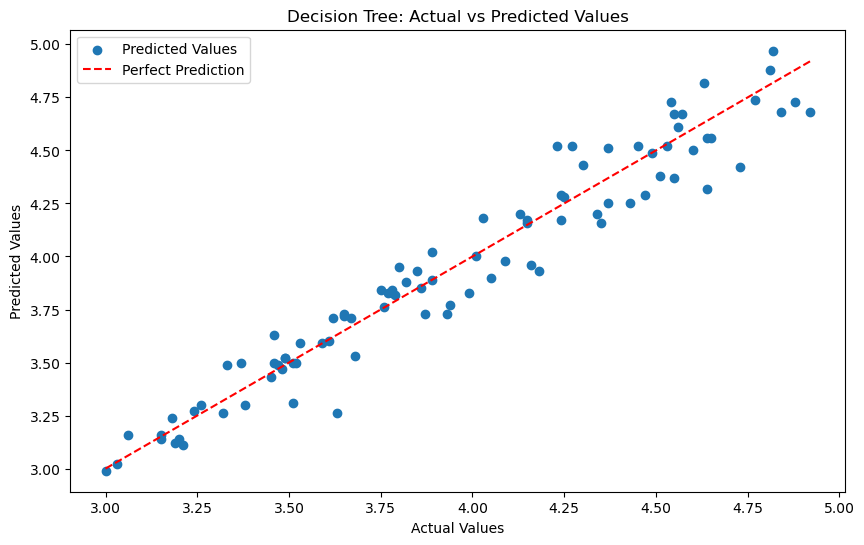

In [93]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)

# Fitting the model on the training data
tree.fit(x_train_scaled, y_train)

yhat_cv = tree.predict(x_cv_scaled)

# Evaluating the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predicting on the test set
yhat_test = tree.predict(x_test_scaled)

# Evaluating the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualizing the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [94]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.12893375447677868
RAE: 0.22396839981834107
MAE: 0.10021739130434777
R2: 0.9378926160679872


### Decision Tree
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.02
Mean Squared Error for Decision Tree: 0.03


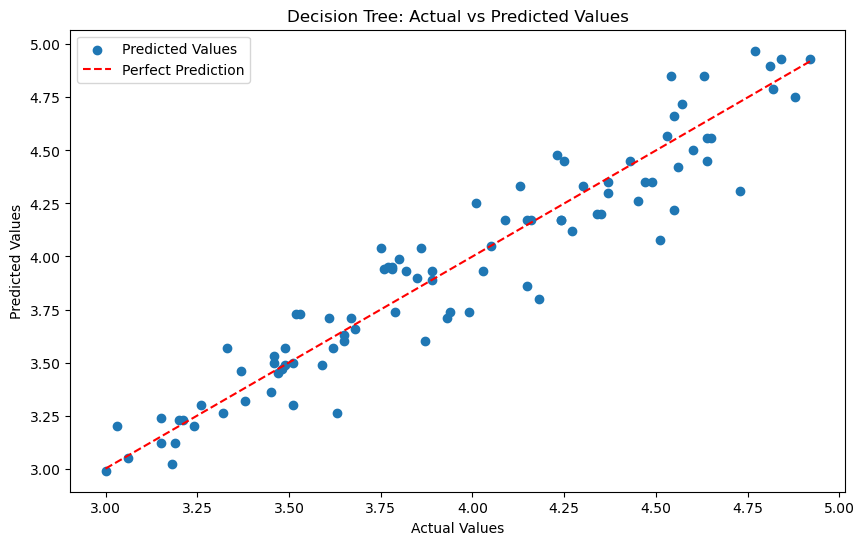

In [95]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [96]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1607151138695019
RAE: 0.2781386310108468
MAE: 0.12445652173913047
R2: 0.9035008654128142


### Decision Tree
### Model 3: Three input features: Temp max, Sun hours and Solar rad

In [97]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced2, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced2)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced2)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Mean Squared Error on Validation Set for Decision Tree: 0.02
Mean Squared Error for Decision Tree: 0.03


In [98]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1765736698082849
RAE: 0.3075314470390673
MAE: 0.13760869565217398
R2: 0.8835171831629491


### Decision Tree
### Model 4: Three input features: Temp min, Sun hours and Solar rad

In [99]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced3, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced3)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced3)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Mean Squared Error on Validation Set for Decision Tree: 0.03
Mean Squared Error for Decision Tree: 0.03


In [100]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1751490048873914
RAE: 0.29757189780636434
MAE: 0.13315217391304346
R2: 0.8853892574399637


### Decision Tree
### Model 5: Three input features: Temp min, Temp max  and Wind speed

In [101]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced4, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced4)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced4)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Mean Squared Error on Validation Set for Decision Tree: 0.07
Mean Squared Error for Decision Tree: 0.09


In [102]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.2999365875009902
RAE: 0.5312569310224646
MAE: 0.2377173913043479
R2: 0.6638997233468653


### Random Forest
### Model 1: All input features

Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.00


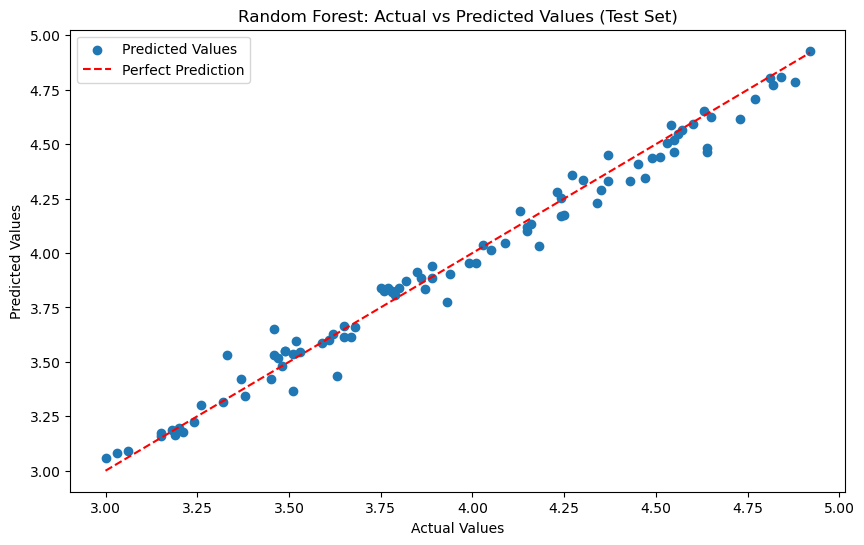

In [103]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [104]:
feature_list = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']
x_train_df = pd.DataFrame(x_train_scaled, columns=feature_list)

# Get feature importances
feature_list = list(x_train_df.columns)
feature_imp = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False)

# Print feature importances
print(feature_imp)

Solar Radiation    0.696036
Sunlight hours     0.139762
Temp max           0.110254
Wind speed         0.049262
Temp min           0.004686
dtype: float64


In [105]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.07013591850982907
RAE: 0.11926438748244096
MAE: 0.053366304347825896
R2: 0.9816223085467263


### Random Forest
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.02


In [107]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.12250897172115185
RAE: 0.20411488862837074
MAE: 0.09133369565217404
R2: 0.9439280361264604


### Random Forest
### Model 3: Three input features: Temp max, Sun hours and Solar rad

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced2, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.02


In [109]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13395788152154048
RAE: 0.22981052564874316
MAE: 0.1028315217391302
R2: 0.9329580682728876


### Random Forest
### Model 4: Three input features: Temp min, Sun hours and Solar rad

In [110]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced3, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.02


In [111]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13784834727999498
RAE: 0.22941700199613438
MAE: 0.10265543478260866
R2: 0.9290073962206451


### Random Forest
### Model 5: Three input features: Temp min and max, Wind speed

Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.05


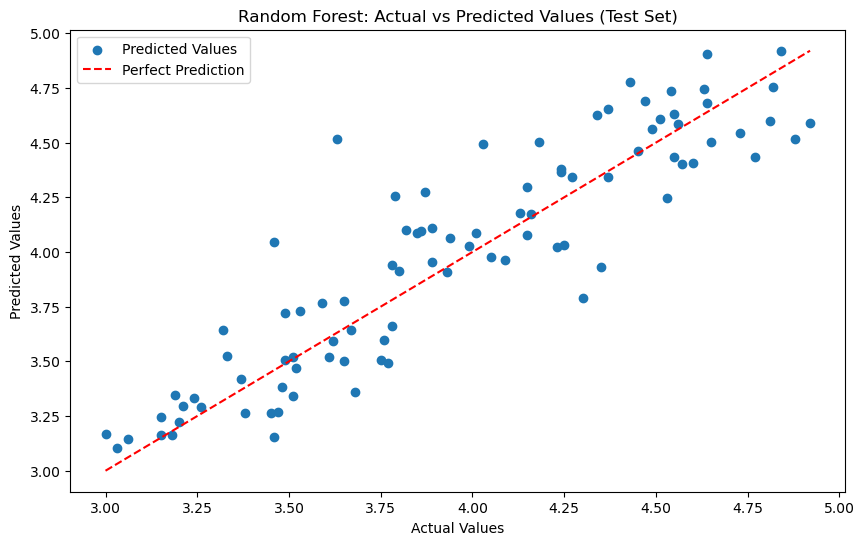

In [112]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced4, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [113]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22748668642362352
RAE: 0.39159247172142847
MAE: 0.1752228260869566
R2: 0.8066598961539935


### Xgboost 
### Model 1: All input features

Mean Squared Error on Validation Set for XGBoost: 0.00
Mean Squared Error on Test Set for XGBoost: 0.00


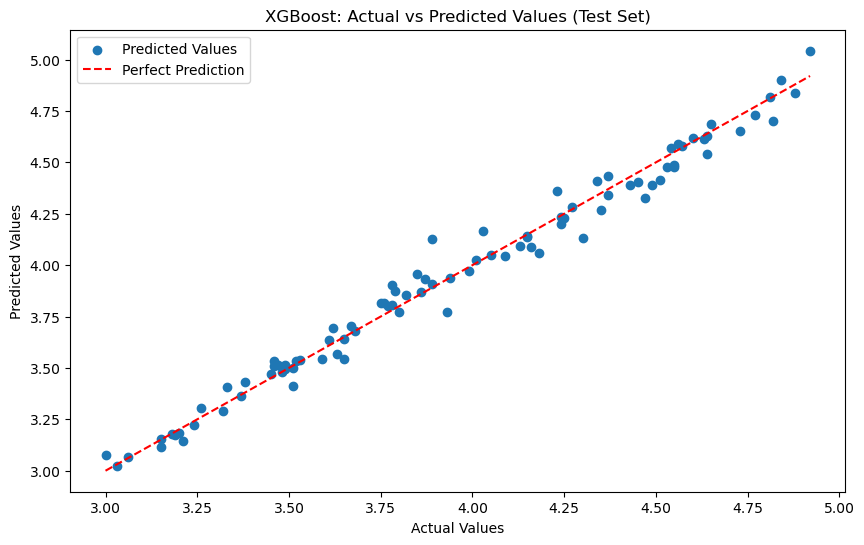

In [114]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Fit the model on the training data
xgb_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_cv = xgb_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Predict on the test set
yhat_test = xgb_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [115]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.06752187931332944
RAE: 0.11304420847371166
MAE: 0.050583009408867875
R2: 0.9829666911716873


### Xgboost
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.01
Mean Squared Error on Test Set for XGBoost: 0.01


Text(0, 0.5, 'Predicted Values')

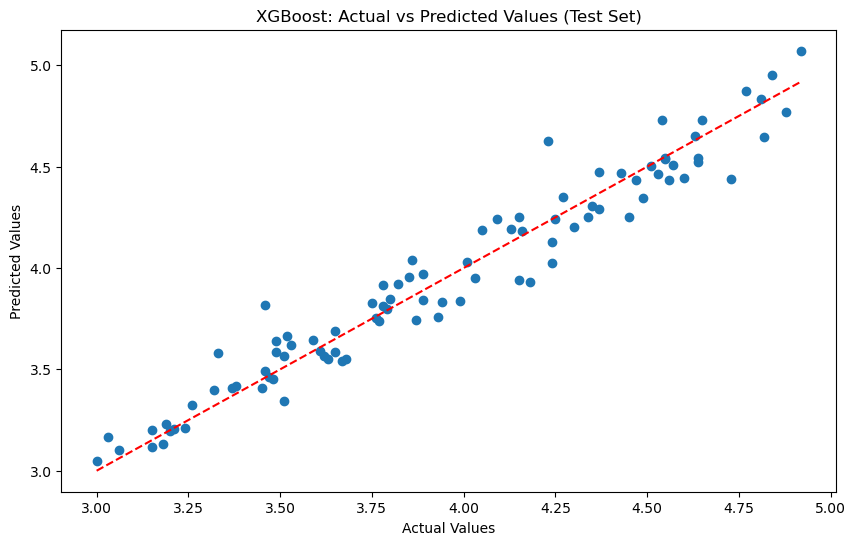

In [116]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Instantiate an XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [117]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.12031384371324878
RAE: 0.2097284699703061
MAE: 0.09384556106899099
R2: 0.9459194398699337


### Xgboost
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.02


Text(0, 0.5, 'Predicted Values')

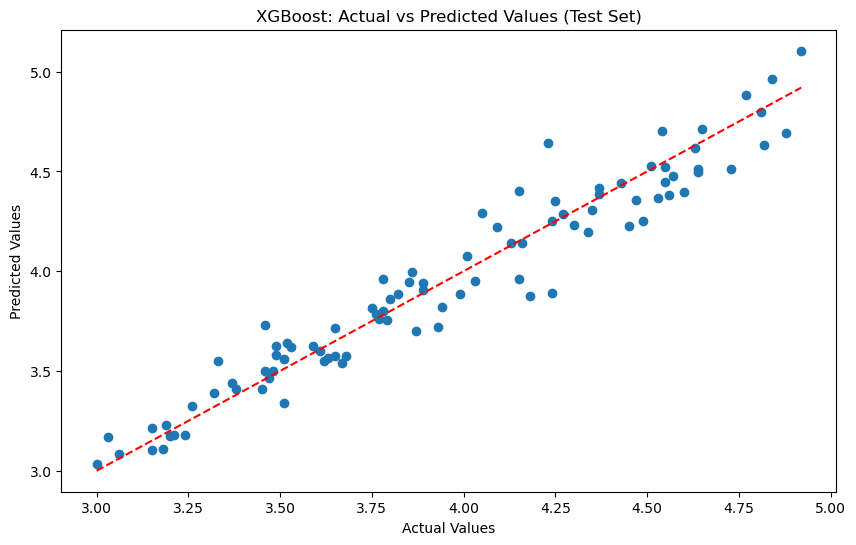

In [118]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [119]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13107730236842885
RAE: 0.2273596098265801
MAE: 0.10173482957093613
R2: 0.9358103559287152


### Xgboost
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.02


Text(0, 0.5, 'Predicted Values')

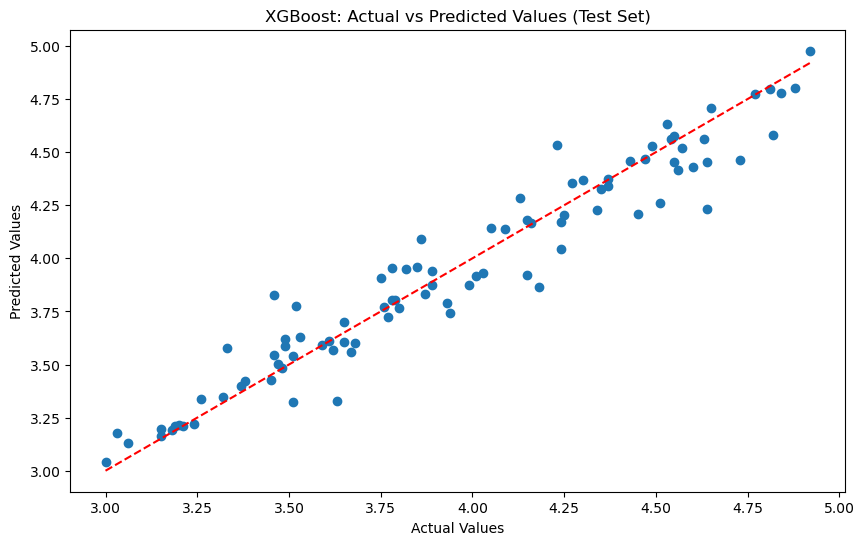

In [120]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [121]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1332147409610966
RAE: 0.21545191996564636
MAE: 0.0964065885543823
R2: 0.933699844476504


### Xgboost
### Model 5: Three input features: Temp min and max, wind speed

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}
Mean Squared Error on Validation Set for XGBoost: 0.04
Mean Squared Error on Test Set for XGBoost: 0.05


Text(0, 0.5, 'Predicted Values')

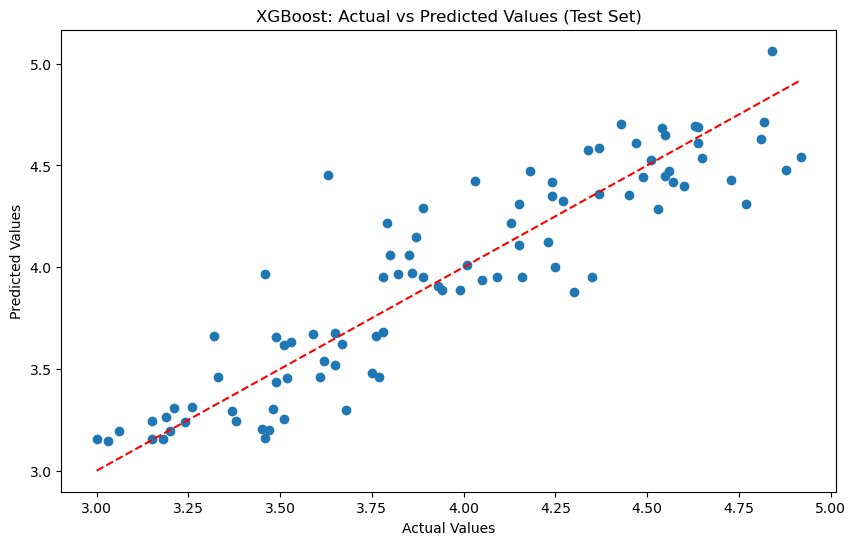

In [122]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [123]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22037578514763762
RAE: 0.38318965786122805
MAE: 0.17146288457124131
R2: 0.8185580423119326


### SVR
### Model 1: All input features

Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error on Validation Set for SVR: 0.00
Mean Squared Error on Test Set for SVR: 0.00


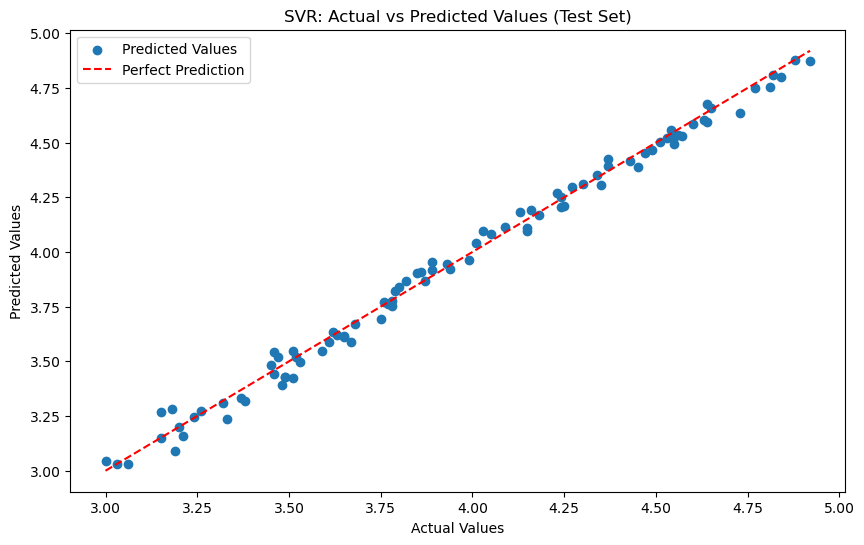

In [124]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [125]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.04441702724143513
RAE: 0.0801341767283433
MAE: 0.03585701443842027
R2: 0.9926292962660869


### SVR
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.01
Mean Squared Error on Test Set for SVR: 0.01


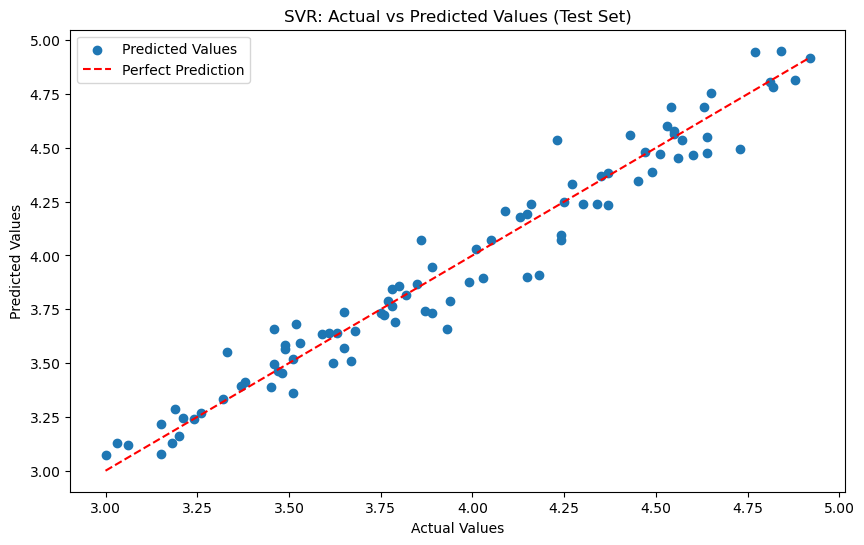

In [126]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [127]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.10919138376456769
RAE: 0.1878942366451009
MAE: 0.08407556714682463
R2: 0.9554562560204164


### SVR
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.01
Mean Squared Error on Test Set for SVR: 0.01


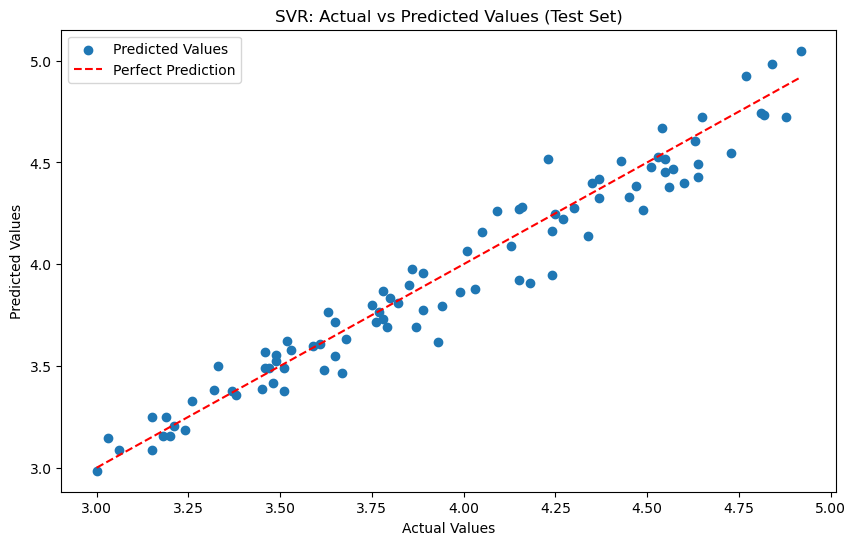

In [128]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [129]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.11833807248797865
RAE: 0.21123180385143048
MAE: 0.09451824614397446
R2: 0.9476810571423882


### SVR
### Model 4: Three input features: Temp min, Sun hours and Solar rad

In [130]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.02


In [131]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.14137692118362077
RAE: 0.26598481366013726
MAE: 0.11901814797628912
R2: 0.9253264123628071


### SVR
### Model 5: Three input features: Temp min and max, Wind speed

Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.04
Mean Squared Error on Test Set for SVR: 0.05


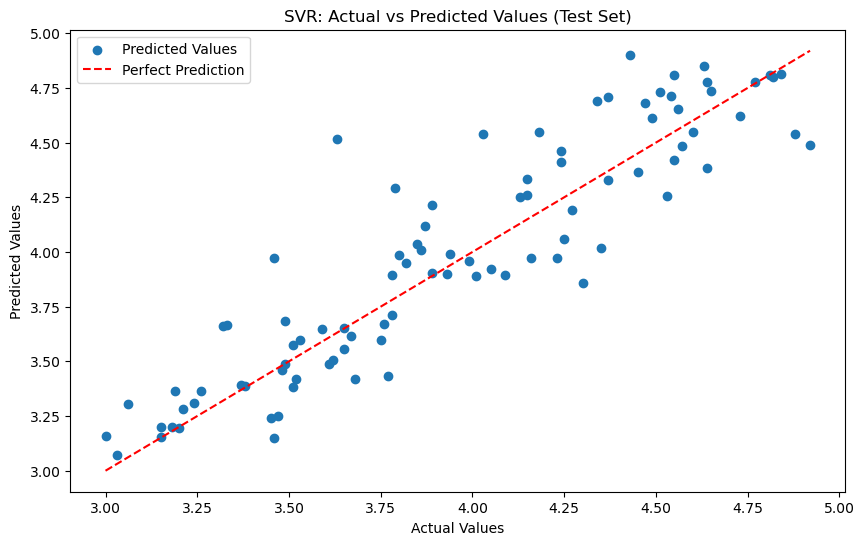

In [132]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [133]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22807911126409727
RAE: 0.385156410878887
MAE: 0.17234293218925173
R2: 0.8056515855152631
